In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
from copy import deepcopy


/tmp/ipykernel_11285/912505187.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Data cleaning

In [2]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import warnings
import nltk


#nltk.download('stopwords')

warnings.filterwarnings("ignore")

In [9]:
train_df = pd.read_csv('/home/developer/Documents/Master/TFM/data/raw/archive (2)/twitter_training.csv')

In [10]:
import pandas as pd

# Leer el archivo CSV
train_df = pd.read_csv('/home/developer/Documents/Master/TFM/data/raw/archive (2)/twitter_training.csv')

# Asignar nombres de columnas
train_df.columns = ["ID", "Game", "Sentiment", "Text"]

# Renombrar columnas y eliminar columnas innecesarias
train_df = train_df.rename(columns={"Text": "text", "Sentiment": "Sentiment"})
train_df = train_df[["text", "Sentiment"]]

# Imprimir DataFrame
print(train_df)


                                                    text Sentiment
0      I am coming to the borders and I will kill you...  Positive
1      im getting on borderlands and i will kill you ...  Positive
2      im coming on borderlands and i will murder you...  Positive
3      im getting on borderlands 2 and i will murder ...  Positive
4      im getting into borderlands and i can murder y...  Positive
...                                                  ...       ...
74676  Just realized that the Windows partition of my...  Positive
74677  Just realized that my Mac window partition is ...  Positive
74678  Just realized the windows partition of my Mac ...  Positive
74679  Just realized between the windows partition of...  Positive
74680  Just like the windows partition of my Mac is l...  Positive

[74681 rows x 2 columns]


In [11]:
train_df.head()

,text,Sentiment
0,I am coming to the borders and I will kill you...,Positive
1,im getting on borderlands and i will kill you ...,Positive
2,im coming on borderlands and i will murder you...,Positive
3,im getting on borderlands 2 and i will murder ...,Positive
4,im getting into borderlands and i can murder y...,Positive


## Dataset Merge

In [12]:
train_df = pd.read_csv('/home/developer/Documents/Master/TFM/data/cleaned/btc_cleaned_200.csv')

In [13]:
# Filter tweets with more than 30 words
train_df['word_count'] = train_df['tweet'].apply(lambda x: len(str(x).split()))
filtered_df = train_df[train_df['word_count'] > 30]

filtered_df.drop(columns=['word_count'], inplace=True)
filtered_df

,Date,tweet,label
4,2019-10-10,MIZO Hemp CBD Isolate order URL ad wsj nytimes...,0
18,2019-09-30,A lesson bitcoiners still think statism okay L...,1
24,2019-06-22,BTC I HOPE NO BODY falls stupid shit like Dont...,1
31,2019-05-17,USER hate say likely correct I missed cycle ti...,0
47,2019-07-10,Current prices changes last hour BTC 1242920 1...,0
...,...,...,...
136221,2019-07-12,NEXCF NexTech Signs AR eCommerce Deal Cannabis...,1
136226,2019-09-29,USER Setup FREE account Now URL Automatic Bitc...,0
136242,2019-08-14,CarSmartt CRSM Uber amp Lyft new competition c...,0
136249,2019-07-06,Binance gives free money airdrops forks Join t...,1


In [14]:
filtered_df.drop(columns=['Date'], inplace=True)
filtered_df

,tweet,label
4,MIZO Hemp CBD Isolate order URL ad wsj nytimes...,0
18,A lesson bitcoiners still think statism okay L...,1
24,BTC I HOPE NO BODY falls stupid shit like Dont...,1
31,USER hate say likely correct I missed cycle ti...,0
47,Current prices changes last hour BTC 1242920 1...,0
...,...,...
136221,NEXCF NexTech Signs AR eCommerce Deal Cannabis...,1
136226,USER Setup FREE account Now URL Automatic Bitc...,0
136242,CarSmartt CRSM Uber amp Lyft new competition c...,0
136249,Binance gives free money airdrops forks Join t...,1


In [15]:
import pandas as pd

# Leer el archivo CSV
train_df = pd.read_csv('/home/developer/Documents/Master/TFM/data/raw/archive (2)/twitter_training.csv')

# Asignar nombres de columnas
train_df.columns = ["ID", "Game", "Sentiment", "Text"]

# Renombrar columnas y eliminar columnas innecesarias
train_df = train_df.rename(columns={"Text": "tweet", "Sentiment": "Sentiment"})
train_df = train_df[["tweet", "Sentiment"]]

# Imprimir DataFrame
print(train_df)


                                                   tweet Sentiment
0      I am coming to the borders and I will kill you...  Positive
1      im getting on borderlands and i will kill you ...  Positive
2      im coming on borderlands and i will murder you...  Positive
3      im getting on borderlands 2 and i will murder ...  Positive
4      im getting into borderlands and i can murder y...  Positive
...                                                  ...       ...
74676  Just realized that the Windows partition of my...  Positive
74677  Just realized that my Mac window partition is ...  Positive
74678  Just realized the windows partition of my Mac ...  Positive
74679  Just realized between the windows partition of...  Positive
74680  Just like the windows partition of my Mac is l...  Positive

[74681 rows x 2 columns]


In [16]:
# Filtrar filas donde la etiqueta no sea 'Neutral'
train_df_cleaned = train_df
train_df_cleaned = train_df_cleaned[train_df_cleaned['Sentiment'] != 'Neutral']
train_df_cleaned = train_df_cleaned[train_df_cleaned['Sentiment'] != 'Irrelevant']

# Reemplazar etiquetas 'Negative' con 0 y 'Positive' con 1
train_df_cleaned['label'] = train_df_cleaned['Sentiment'].apply(lambda x: 0 if x == 'Negative' else 1)

# Eliminar la columna 'Sentiment' si ya no la necesitas
train_df_cleaned.drop(columns=['Sentiment'], inplace=True)
train_df = train_df_cleaned
train_df

,tweet,label
0,I am coming to the borders and I will kill you...,1
1,im getting on borderlands and i will kill you ...,1
2,im coming on borderlands and i will murder you...,1
3,im getting on borderlands 2 and i will murder ...,1
4,im getting into borderlands and i can murder y...,1
...,...,...
74676,Just realized that the Windows partition of my...,1
74677,Just realized that my Mac window partition is ...,1
74678,Just realized the windows partition of my Mac ...,1
74679,Just realized between the windows partition of...,1


In [19]:
# Concatenating `selected_df` and `df`
combined_df = pd.concat([filtered_df, train_df], ignore_index=True)
combined_df['tweet'] = combined_df['tweet'].astype(str)
combined_df.rename(columns={"label": "Sentiment"}, inplace=True)
combined_df.to_csv('/home/developer/Documents/Master/TFM/data/final/final_dataset.csv', index=False)

## Análisis exploratorio de los datos

In [8]:
df = train_df

In [9]:
# Descripción básica del dataset
print(df.describe())

# Conteo de valores únicos para 'Sentiment'
print(df['label'].value_counts())

              label
count  48731.000000
mean       0.496214
std        0.499991
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
label
0    24550
1    24181
Name: count, dtype: int64


La muestra contiene tweets de 1,773 fechas distintas, con un pico notable el 3 de agosto de 2018, donde se registraron 5,200 tweets. La repetición del contenido es considerable, con 82,918 tweets únicos. El mensaje más repetido  está 4500 poniendo de manifiesto la fuerte difusión que pueden tener las redes sociales y lo que pueden influir en los sentimeintos del mercado. Desde la perspectiva del sentimiento, se observa una distribución donde predominan las opiniones negativas, constituyendo 50.4% de los tweets cuyos sentimientos fueron identificados (50,400 de 95,406). Las opiniones positivas siguen de cerca, con 47.2% (45,005), y un solo tweet clasificado como neutral.



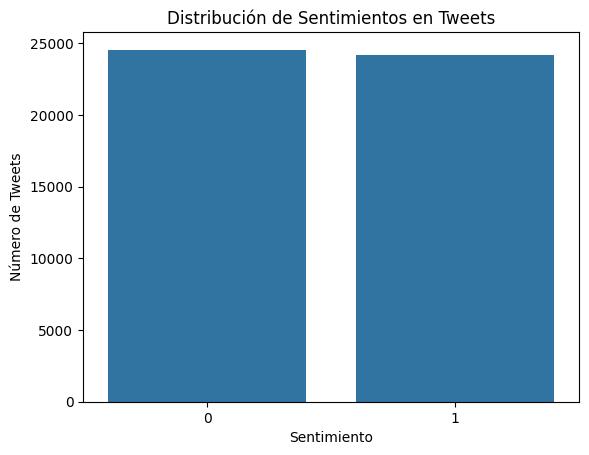

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Conteo de tweets por sentimiento
sns.countplot(x='label', data=df)
plt.title('Distribución de Sentimientos en Tweets')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Tweets')
plt.show()



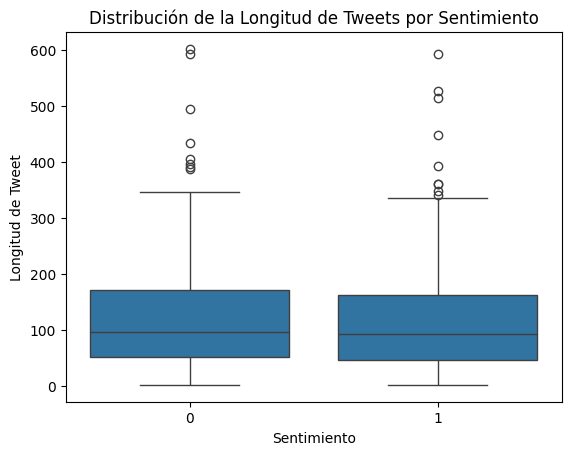

In [11]:
df['tweet'] = df['tweet'].astype(str)
# Cálculo de la longitud de cada tweet
df['Tweet Length'] = df['tweet'].apply(len)

# Boxplot de la longitud de tweets por sentimiento
sns.boxplot(x='label', y='Tweet Length', data=df)
plt.title('Distribución de la Longitud de Tweets por Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Longitud de Tweet')
plt.show()


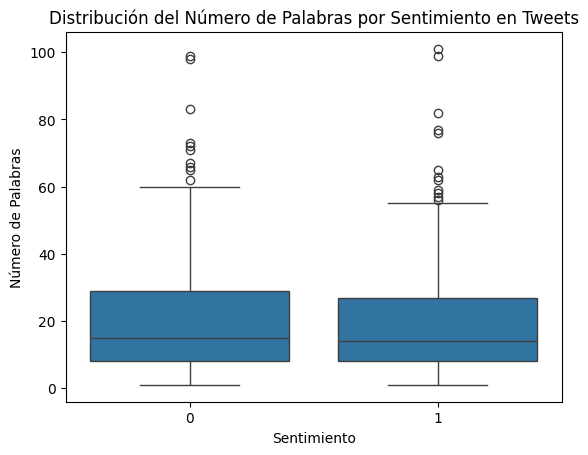

In [12]:

# Primero, calculamos el número de palabras en cada tweet
df['Word Count'] = df['tweet'].apply(lambda x: len(str(x).split()))

# Ahora, creamos un boxplot de la cantidad de palabras por sentimiento
sns.boxplot(x='label', y='Word Count', data=df)
plt.title('Distribución del Número de Palabras por Sentimiento en Tweets')
plt.xlabel('Sentimiento')
plt.ylabel('Número de Palabras')
plt.show()


In [13]:
# Encuentra el índice del tweet más largo
indice_max_longitud = df['Tweet Length'].idxmax()

# Imprime el tweet más largo junto con su longitud
tweet_mas_largo = df.loc[indice_max_longitud, 'tweet']
longitud_tweet_mas_largo = df.loc[indice_max_longitud, 'Tweet Length']

print(f"El tweet más largo tiene {longitud_tweet_mas_largo} caracteres y es:\n{tweet_mas_largo}")


El tweet más largo tiene 602 caracteres y es:
At time many lowincome countries world today including United States United Kingdom France Germany Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy Italy


In [14]:
# Cálculo del número de palabras en cada tweet
df['Word Count'] = df['tweet'].apply(lambda x: len(x.split()))

# Encuentra el índice del tweet con el mayor número de palabras
indice_max_palabras = df['Word Count'].idxmax()

# Imprime el tweet con el mayor número de palabras junto con su cuenta
tweet_mas_palabras = df.loc[indice_max_palabras, 'tweet']
num_palabras_tweet_mas_palabras = df.loc[indice_max_palabras, 'Word Count']

print(f"El tweet con más palabras tiene {num_palabras_tweet_mas_palabras} palabras y es:\n{tweet_mas_palabras}")


El tweet con más palabras tiene 101 palabras y es:
USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER USER NOW WE TRIGGERED ALL OF YOU HEY I HAVE A prophecy FOR YOU buy TRUMP minted coin OR bitcoin OR EXTRA spyware TO COMPLIMENT YOUR applemicrosoft spyware WE RUN WIDE OPEN DO THE WALK SEARCH jesus HERE WE TOLD THE STORY IN DETAIL WE SPHINCTER THE old aas ALSO Qanon MAGA


In [15]:
from langdetect import detect

# Definimos una función para detectar el idioma
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'error'

# Aplicamos la función al dataset
df['language'] = df['tweet'].apply(detect_language)

# Contamos cuántos tweets hay por idioma
print(df['language'].value_counts())


language
en    48237
fr       61
no       45
nl       44
de       42
da       39
af       37
sv       34
tl       33
it       31
cy       17
so       16
ro       15
ca       12
pl       11
sw       10
id        9
et        9
sq        7
pt        5
es        5
tr        3
hr        2
sk        2
sl        1
vi        1
cs        1
fi        1
hu        1
Name: count, dtype: int64


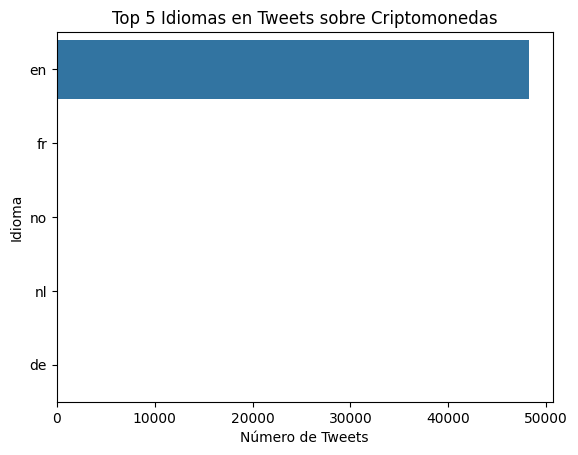

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegúrate de que los datos están en el formato correcto
idiomas = df['language'].value_counts()

# Selecciona solo los top 5 idiomas
top_5_idiomas = idiomas.head(5)

# Crea un gráfico de barras para los top 5 idiomas
sns.barplot(x=top_5_idiomas.values, y=top_5_idiomas.index)

# Añade títulos y etiquetas para hacerlo más informativo
plt.title('Top 5 Idiomas en Tweets sobre Criptomonedas')
plt.xlabel('Número de Tweets')
plt.ylabel('Idioma')

# Muestra el gráfico
plt.show()


[nltk_data] Downloading package punkt to /home/developer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/developer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


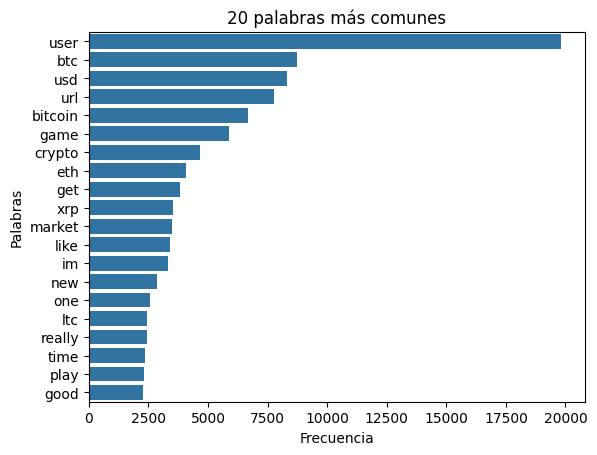

In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns

# Descargamos las stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Función para extraer las palabras más comunes
def get_most_common_words(text_series, num=20):
    words = ' '.join(text_series).lower()
    tokens = word_tokenize(words)
    filtered_words = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    fd = nltk.FreqDist(filtered_words)
    return fd.most_common(num)

# Obtenemos las 20 palabras más comunes
common_words = get_most_common_words(df['tweet'])

# Visualizamos las palabras más comunes
sns.barplot(x=[x[1] for x in common_words], y=[x[0] for x in common_words])
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('20 palabras más comunes')
plt.show()


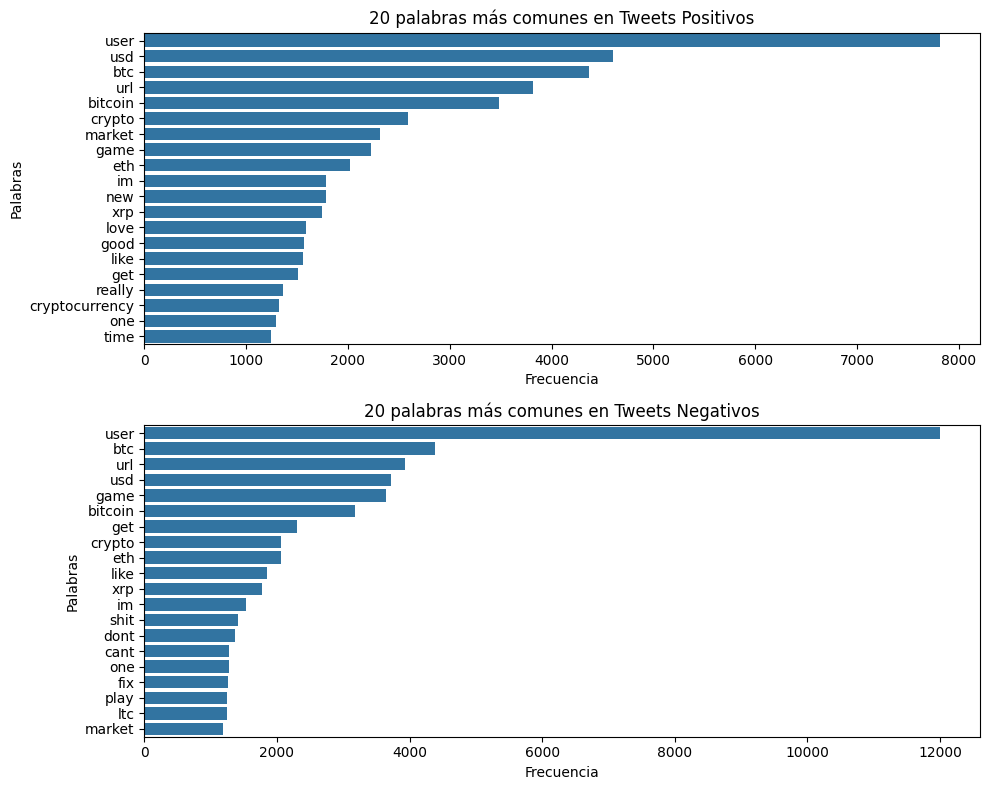

In [18]:
# Filtramos el dataframe para obtener solo los tweets con sentimiento positivo
df_positive = df[df['label'] == 1]

# Filtramos el dataframe para obtener solo los tweets con sentimiento negativo
df_negative = df[df['label'] == 0]

# Obtenemos las 20 palabras más comunes en tweets positivos
common_words_positive = get_most_common_words(df_positive['tweet'])

# Obtenemos las 20 palabras más comunes en tweets negativos
common_words_negative = get_most_common_words(df_negative['tweet'])

# Configuramos los gráficos para visualizar las palabras más comunes en tweets positivos
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, posición 1
sns.barplot(x=[x[1] for x in common_words_positive], y=[x[0] for x in common_words_positive])
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('20 palabras más comunes en Tweets Positivos')

# Configuramos los gráficos para visualizar las palabras más comunes en tweets negativos
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, posición 2
sns.barplot(x=[x[1] for x in common_words_negative], y=[x[0] for x in common_words_negative])
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('20 palabras más comunes en Tweets Negativos')

plt.tight_layout()  # Ajusta automáticamente los subplots para que se ajusten en el área de la figura
plt.show()


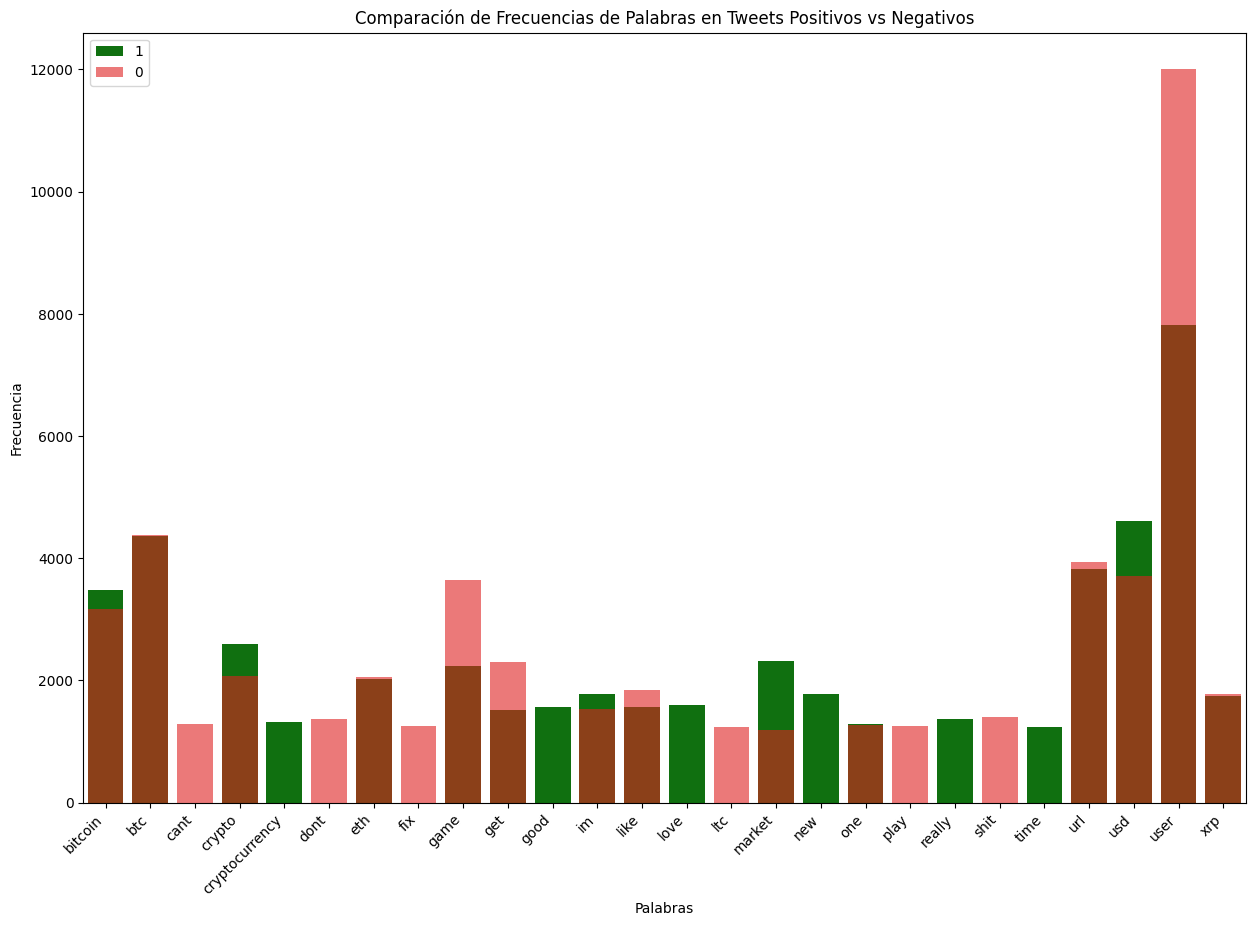

In [19]:
import pandas as pd

# Suponiendo que common_words_positive y common_words_negative están disponibles
# Convertimos las listas de palabras comunes en dataframes
df_common_words_positive = pd.DataFrame(common_words_positive, columns=['word', 'positive_freq'])
df_common_words_negative = pd.DataFrame(common_words_negative, columns=['word', 'negative_freq'])

# Unimos los dataframes en uno solo basado en las palabras
df_common_words = pd.merge(df_common_words_positive, df_common_words_negative, on='word', how='outer')

# Llenamos los valores NaN con 0, ya que significa que la palabra no apareció en ese sentimiento
df_common_words.fillna(0, inplace=True)

# Creamos un gráfico de barras agrupadas
plt.figure(figsize=(15, 10))

# Barras para frecuencias positivas
sns.barplot(data=df_common_words, x='word', y='positive_freq', color='green', label=1)

# Barras para frecuencias negativas
sns.barplot(data=df_common_words, x='word', y='negative_freq', color='red', label=0, alpha=0.6)

plt.xticks(rotation=45, ha="right")
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Comparación de Frecuencias de Palabras en Tweets Positivos vs Negativos')
plt.legend()
plt.show()


## Preparación del dataset

In [7]:
train_df = pd.read_csv('/home/developer/Documents/Master/TFM/src/final_dataset.csv')

In [117]:
#train_df = train_df.sample(n=1000, random_state=42)
train_df_cleaned = train_df.dropna(subset=['Sentiment'])

# Renombrar la columna 'Text' a 'Tweet'
train_df_cleaned.rename(columns={'text': 'tweet'}, inplace=True)

# Filtrar filas donde la etiqueta no sea 'Neutral'
train_df_cleaned = train_df_cleaned[train_df_cleaned['Sentiment'] != 'Neutral']
train_df_cleaned = train_df_cleaned[train_df_cleaned['Sentiment'] != 'Irrelevant']

# Reemplazar etiquetas 'Negative' con 0 y 'Positive' con 1
train_df_cleaned['label'] = train_df_cleaned['Sentiment'].apply(lambda x: 0 if x == 'Negative' else 1)

# Eliminar la columna 'Sentiment' si ya no la necesitas
train_df_cleaned.drop(columns=['Sentiment'], inplace=True)
train_df = train_df_cleaned


In [10]:
from langdetect import detect

# Definimos una función para detectar el idioma
def detect_language(text):
    try:
        return detect(text)
    except:
        return 'error'

# Aplicamos la función al dataset
train_df['language'] = train_df['tweet'].apply(detect_language)

In [11]:
# Filtrar solo los registros en inglés
train_df = train_df[train_df['language'] == 'en']

# Eliminar la columna de idioma
train_df.drop(columns=['language'], inplace=True)


In [4]:
df = train_df

In [5]:
def text_cleaning(text):
    """
    Clean the text using NLP and regular expressions
    
    text = Uncleaned text
    """
    text = re.sub(r'https?://\S+|www\.\S+', 'URL', text)
    text = re.sub(r'<.*?>', '', text)
    text = ''.join([char for char in text if char in string.printable])
    text = re.sub(r'@\S+', 'USER', text)
    table = str.maketrans('', '', string.punctuation)
    text = text.translate(table)
    text = ' '.join([word for word in text.split() if word not in stopwords.words("english")])
    return text

In [6]:
#train_df = pd.read_csv('/home/developer/Documents/Master/TFM/train_cleaned.csv')
df['tweet'] = df['tweet'].astype(str)
df["tweet"] = df["tweet"].apply(text_cleaning)
df.to_csv('final_dataset.csv', index=False)

## NLP

In [3]:
train_df = pd.read_csv('final_dataset.csv')

In [4]:
train_df


,tweet,label
0,MIZO Hemp CBD Isolate order URL ad wsj nytimes...,0
1,A lesson bitcoiners still think statism okay L...,1
2,BTC I HOPE NO BODY falls stupid shit like Dont...,1
3,USER hate say likely correct I missed cycle ti...,0
4,Current prices changes last hour BTC 1242920 1...,0
...,...,...
48726,With regulatory clarity still elusive investor...,0
48727,As crypto market enters new phase maturity inv...,0
48728,Despite regulatory crackdowns heightened scrut...,1
48729,In absence regulatory clarity investors left n...,0


Tamaño del conjunto de datos seleccionado: (48731, 2)


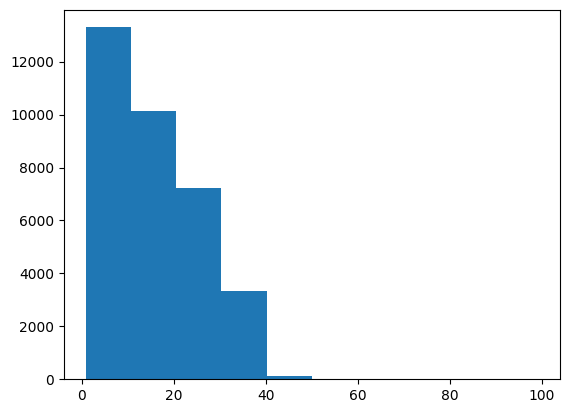

In [5]:
# Seleccionar un 10% aleatorio del conjunto de datos
percent = 1
train_df = train_df.sample(frac=percent, random_state=42)

# Imprimir información sobre el tamaño del conjunto de datos seleccionado
print("Tamaño del conjunto de datos seleccionado:", train_df.shape)


words = dict()

def add_to_dict(d, filename):
  with open(filename, 'r') as f:
    for line in f.readlines():
      line = line.split(' ')

      try:
        d[line[0]] = np.array(line[1:], dtype=float)
      except:
        continue
    
add_to_dict(words, '/home/developer/Documents/Master/TFM/Glove/glove.6B.50d.txt')


tokenizer = nltk.RegexpTokenizer(r"\w+")


lemmatizer = WordNetLemmatizer()


def message_to_token_list(s):
  tokens = tokenizer.tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t in words]

  return useful_tokens

def message_to_word_vectors(message, word_dict=words):
  processed_list_of_tokens = message_to_token_list(message)

  vectors = []

  for token in processed_list_of_tokens:
    if token not in word_dict:
      continue

    token_vector = word_dict[token]
    vectors.append(token_vector)

  return np.array(vectors, dtype=float)

train_df = train_df.sample(frac=1, random_state=1)
train_df.reset_index(drop=True, inplace=True)

split_index_1 = int(len(train_df) * 0.7)
split_index_2 = int(len(train_df) * 0.85)

train_df, val_df, test_df = train_df[:split_index_1], train_df[split_index_1:split_index_2], train_df[split_index_2:]

def df_to_X_y(dff):
    # Eliminar registros con valores NaN en la columna 'tweet'
    dff = dff.dropna(subset=['tweet'])

    y = dff['label'].to_numpy().astype(int)

    all_word_vector_sequences = []

    for message in dff['tweet']:
        if isinstance(message, str):  # Comprobar si el mensaje es una cadena
            message_as_vector_seq = message_to_word_vectors(message)

            if message_as_vector_seq.shape[0] == 0:
                message_as_vector_seq = np.zeros(shape=(1, 50))

            all_word_vector_sequences.append(message_as_vector_seq)
        else:
            print("Mensaje no válido:", message)
            continue

    # Asegurar que X y y tengan la misma longitud
    min_length = min(len(all_word_vector_sequences), len(y))
    all_word_vector_sequences = all_word_vector_sequences[:min_length]
    y = y[:min_length]

    return all_word_vector_sequences, y

    

def pad_X(X, desired_sequence_length=60):
    X_copy = deepcopy(X)
    padded_sequences = []

    for x in X_copy:
        x_seq_len = x.shape[0]
        
        if x_seq_len > desired_sequence_length:
            # Recortar la secuencia si es más larga que la longitud deseada
            padded_sequence = x[:desired_sequence_length]
        else:
            # Rellenar con ceros si la secuencia es más corta que la longitud deseada
            sequence_length_difference = desired_sequence_length - x_seq_len
            pad = np.zeros(shape=(sequence_length_difference, 50))
            padded_sequence = np.concatenate([x, pad])

        padded_sequences.append(padded_sequence)

    return np.array(padded_sequences).astype(float)

X_train, y_train = df_to_X_y(train_df)
sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))

import matplotlib.pyplot as plt

plt.hist(sequence_lengths)
pd.Series(sequence_lengths).describe()

X_train = pad_X(X_train)


X_val, y_val = df_to_X_y(val_df)
X_val = pad_X(X_val)

X_test, y_test = df_to_X_y(test_df)
X_test = pad_X(X_test)

# Modelos Redes neuronales

In [6]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import tensorflow as tf



2024-03-31 10:53:04.568298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 10:53:06.133080: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/developer/anaconda3/envs/tf/lib/
2024-03-31 10:53:06.133311: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/developer/anaconda3/envs/tf/lib/
2024-03-31 10:53:06.133316: W tensorflow/compiler/

## Perceptrón multicapa

In [10]:
# Aplanando la entrada para ajustarla a un MLP
model_mlp= Sequential()
model_mlp.add(layers.Flatten(input_shape=(60, 50)))
model_mlp.add(layers.Dense(128, activation='relu'))
model_mlp.add(layers.Dropout(0.2))
model_mlp.add(layers.Dense(64, activation='relu'))
model_mlp.add(layers.Dropout(0.2))
model_mlp.add(layers.Dense(1, activation='sigmoid'))


cp = ModelCheckpoint('/home/developer/Documents/Master/TFM/models/model_mp/', save_best_only=True)

model_mlp.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy', AUC(name='auc')])
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3000)              0         
                                                                 
 dense (Dense)               (None, 128)               384128    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 392,449
Trainable params: 392,449
Non-trai

In [11]:
history = model_mlp.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=16, callbacks=[cp])

Epoch 1/10
2132/2132 [==============================] - 8s 3ms/step - loss: 0.6030 - accuracy: 0.6610 - auc: 0.7285 - val_loss: 0.5372 - val_accuracy: 0.7190 - val_auc: 0.8030
Epoch 2/10
2132/2132 [==============================] - 6s 3ms/step - loss: 0.5133 - accuracy: 0.7362 - auc: 0.8221 - val_loss: 0.5087 - val_accuracy: 0.7347 - val_auc: 0.8244
Epoch 3/10
2132/2132 [==============================] - 7s 3ms/step - loss: 0.4662 - accuracy: 0.7722 - auc: 0.8598 - val_loss: 0.4976 - val_accuracy: 0.7425 - val_auc: 0.8344
Epoch 4/10
2132/2132 [==============================] - 6s 3ms/step - loss: 0.4235 - accuracy: 0.8007 - auc: 0.8874 - val_loss: 0.4909 - val_accuracy: 0.7543 - val_auc: 0.8416
Epoch 5/10
2132/2132 [==============================] - 6s 3ms/step - loss: 0.3779 - accuracy: 0.8303 - auc: 0.9130 - val_loss: 0.4941 - val_accuracy: 0.7620 - val_auc: 0.8484
Epoch 6/10
2132/2132 [==============================] - 6s 3ms/step - loss: 0.3331 - accuracy: 0.8554 - auc: 0.9335 - va

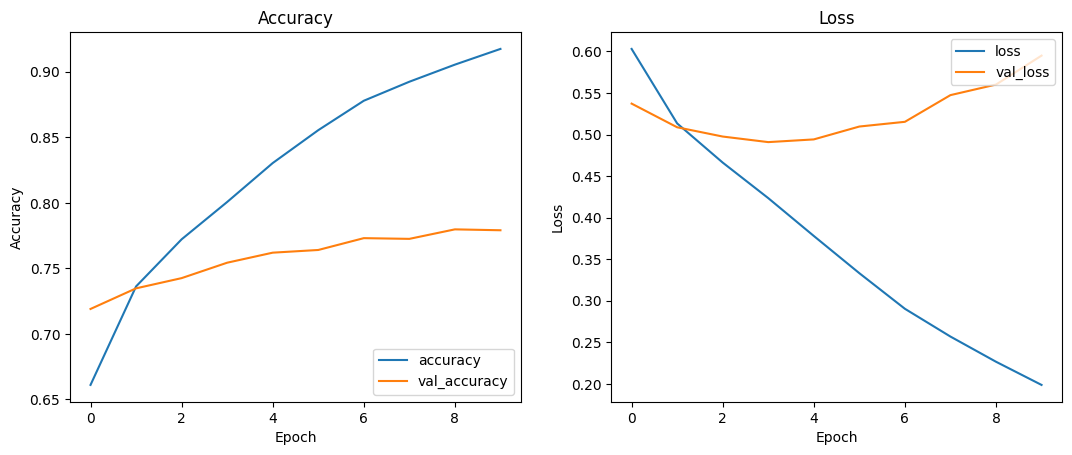

In [12]:
# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')         
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')  
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')         
plt.plot(history.history['val_loss'], label='val_loss')  
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

## RRNN

In [12]:
model_rnn = Sequential()

model_rnn.add(layers.SimpleRNN(64, return_sequences=True, input_shape=(60, 50)))
model_rnn.add(layers.Dropout(0.2))
model_rnn.add(layers.SimpleRNN(64, return_sequences=True))
model_rnn.add(layers.Dropout(0.2))
model_rnn.add(layers.SimpleRNN(64, return_sequences=True))
model_rnn.add(layers.Dropout(0.2))
model_rnn.add(layers.GlobalMaxPooling1D())
model_rnn.add(layers.Dense(1, activation='sigmoid'))

cp = ModelCheckpoint('/home/developer/Documents/Master/TFM/models/model_rnn/', save_best_only=True)

model_rnn.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy', AUC(name='auc')])
model_rnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 60, 64)            7360      
                                                                 
 dropout_6 (Dropout)         (None, 60, 64)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 60, 64)            8256      
                                                                 
 dropout_7 (Dropout)         (None, 60, 64)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60, 64)            8256      
                                                                 
 dropout_8 (Dropout)         (None, 60, 64)            0         
                                                                 
 global_max_pooling1d_2 (Glo  (None, 64)              

In [13]:
history = model_rnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[cp])

Epoch 1/100
1066/1066 [==============================] - ETA: 0s - loss: 0.6559 - accuracy: 0.5916 - auc: 0.6437INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 81s 73ms/step - loss: 0.6559 - accuracy: 0.5916 - auc: 0.6437 - val_loss: 0.6015 - val_accuracy: 0.6777 - val_auc: 0.7483
Epoch 2/100
1066/1066 [==============================] - ETA: 0s - loss: 0.5911 - accuracy: 0.6736 - auc: 0.7489INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 80s 75ms/step - loss: 0.5911 - accuracy: 0.6736 - auc: 0.7489 - val_loss: 0.5722 - val_accuracy: 0.6975 - val_auc: 0.7692
Epoch 3/100
1066/1066 [==============================] - 76s 71ms/step - loss: 0.5847 - accuracy: 0.6835 - auc: 0.7548 - val_loss: 0.5766 - val_accuracy: 0.6962 - val_auc: 0.7675
Epoch 4/100
1066/1066 [==============================] - ETA: 0s - loss: 0.5723 - accuracy: 0.6922 - auc: 0.7688INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 76s 71ms/step - loss: 0.5723 - accuracy: 0.6922 - auc: 0.7688 - val_loss: 0.5547 - val_accuracy: 0.7037 - val_auc: 0.7850
Epoch 5/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.5596 - accuracy: 0.6997 - auc: 0.7806 - val_loss: 0.5711 - val_accuracy: 0.6926 - val_auc: 0.7857
Epoch 6/100
1066/1066 [==============================] - ETA: 0s - loss: 0.5535 - accuracy: 0.7068 - auc: 0.7872INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 74s 69ms/step - loss: 0.5535 - accuracy: 0.7068 - auc: 0.7872 - val_loss: 0.5436 - val_accuracy: 0.7083 - val_auc: 0.7939
Epoch 7/100
1066/1066 [==============================] - 74s 69ms/step - loss: 0.5486 - accuracy: 0.7090 - auc: 0.7913 - val_loss: 0.5551 - val_accuracy: 0.7127 - val_auc: 0.7973
Epoch 8/100
1066/1066 [==============================] - ETA: 0s - loss: 0.5526 - accuracy: 0.7066 - auc: 0.7867INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 76s 72ms/step - loss: 0.5526 - accuracy: 0.7066 - auc: 0.7867 - val_loss: 0.5433 - val_accuracy: 0.7057 - val_auc: 0.7969
Epoch 9/100
1066/1066 [==============================] - 73s 68ms/step - loss: 0.5621 - accuracy: 0.6997 - auc: 0.7783 - val_loss: 0.5488 - val_accuracy: 0.7149 - val_auc: 0.7945
Epoch 10/100
1066/1066 [==============================] - ETA: 0s - loss: 0.5509 - accuracy: 0.7123 - auc: 0.7905INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 78s 73ms/step - loss: 0.5509 - accuracy: 0.7123 - auc: 0.7905 - val_loss: 0.5399 - val_accuracy: 0.7135 - val_auc: 0.8041
Epoch 11/100
1066/1066 [==============================] - ETA: 0s - loss: 0.5408 - accuracy: 0.7141 - auc: 0.7986INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 76s 71ms/step - loss: 0.5408 - accuracy: 0.7141 - auc: 0.7986 - val_loss: 0.5395 - val_accuracy: 0.7083 - val_auc: 0.8022
Epoch 12/100
1066/1066 [==============================] - ETA: 0s - loss: 0.5336 - accuracy: 0.7189 - auc: 0.8039INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 76s 71ms/step - loss: 0.5336 - accuracy: 0.7189 - auc: 0.8039 - val_loss: 0.5281 - val_accuracy: 0.7211 - val_auc: 0.8106
Epoch 13/100
1066/1066 [==============================] - ETA: 0s - loss: 0.5411 - accuracy: 0.7141 - auc: 0.7967INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 79s 74ms/step - loss: 0.5411 - accuracy: 0.7141 - auc: 0.7967 - val_loss: 0.5281 - val_accuracy: 0.7259 - val_auc: 0.8126
Epoch 14/100
1066/1066 [==============================] - 73s 69ms/step - loss: 0.5432 - accuracy: 0.7194 - auc: 0.7975 - val_loss: 0.5414 - val_accuracy: 0.7183 - val_auc: 0.8037
Epoch 15/100
1066/1066 [==============================] - ETA: 0s - loss: 0.5398 - accuracy: 0.7199 - auc: 0.8002INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 73s 68ms/step - loss: 0.5398 - accuracy: 0.7199 - auc: 0.8002 - val_loss: 0.5280 - val_accuracy: 0.7295 - val_auc: 0.8137
Epoch 16/100
1066/1066 [==============================] - 72s 68ms/step - loss: 0.5283 - accuracy: 0.7231 - auc: 0.8085 - val_loss: 0.5312 - val_accuracy: 0.7228 - val_auc: 0.8183
Epoch 17/100
1066/1066 [==============================] - 73s 69ms/step - loss: 0.5189 - accuracy: 0.7270 - auc: 0.8156 - val_loss: 0.5415 - val_accuracy: 0.7096 - val_auc: 0.8157
Epoch 18/100
1065/1066 [============================>.] - ETA: 0s - loss: 0.5274 - accuracy: 0.7240 - auc: 0.8094INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 77s 72ms/step - loss: 0.5275 - accuracy: 0.7240 - auc: 0.8094 - val_loss: 0.5166 - val_accuracy: 0.7342 - val_auc: 0.8207
Epoch 19/100
1066/1066 [==============================] - 73s 69ms/step - loss: 0.5221 - accuracy: 0.7286 - auc: 0.8134 - val_loss: 0.5207 - val_accuracy: 0.7253 - val_auc: 0.8146
Epoch 20/100
1066/1066 [==============================] - 73s 68ms/step - loss: 0.5210 - accuracy: 0.7261 - auc: 0.8138 - val_loss: 0.5222 - val_accuracy: 0.7215 - val_auc: 0.8156
Epoch 21/100
1066/1066 [==============================] - 73s 68ms/step - loss: 0.5233 - accuracy: 0.7276 - auc: 0.8139 - val_loss: 0.5187 - val_accuracy: 0.7364 - val_auc: 0.8220
Epoch 22/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.5284 - accuracy: 0.7234 - auc: 0.8091 - val_loss: 0.5205 - val_accuracy: 0.7327 - val_auc: 0.8190
Epoch 23/100
1066/1066 [==============================] - 73s 69ms/step - loss: 0.5278 - accuracy: 0.7207 - auc: 

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 77s 73ms/step - loss: 0.5233 - accuracy: 0.7258 - auc: 0.8129 - val_loss: 0.5088 - val_accuracy: 0.7406 - val_auc: 0.8276
Epoch 27/100
1066/1066 [==============================] - ETA: 0s - loss: 0.5111 - accuracy: 0.7337 - auc: 0.8226INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 75s 71ms/step - loss: 0.5111 - accuracy: 0.7337 - auc: 0.8226 - val_loss: 0.5065 - val_accuracy: 0.7409 - val_auc: 0.8303
Epoch 28/100
1066/1066 [==============================] - 74s 69ms/step - loss: 0.5360 - accuracy: 0.7177 - auc: 0.8015 - val_loss: 0.5701 - val_accuracy: 0.7007 - val_auc: 0.7825
Epoch 29/100
1066/1066 [==============================] - 72s 68ms/step - loss: 0.5485 - accuracy: 0.7140 - auc: 0.7949 - val_loss: 0.5249 - val_accuracy: 0.7345 - val_auc: 0.8193
Epoch 30/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.5298 - accuracy: 0.7222 - auc: 0.8099 - val_loss: 0.5161 - val_accuracy: 0.7383 - val_auc: 0.8238
Epoch 31/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.5142 - accuracy: 0.7339 - auc: 0.8221 - val_loss: 0.5128 - val_accuracy: 0.7365 - val_auc: 0.8268
Epoch 32/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.5114 - accuracy: 0.7362 - auc: 

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 77s 72ms/step - loss: 0.5037 - accuracy: 0.7388 - auc: 0.8284 - val_loss: 0.4998 - val_accuracy: 0.7468 - val_auc: 0.8354
Epoch 34/100
1066/1066 [==============================] - 70s 65ms/step - loss: 0.5070 - accuracy: 0.7375 - auc: 0.8263 - val_loss: 0.5204 - val_accuracy: 0.7257 - val_auc: 0.8197
Epoch 35/100
1066/1066 [==============================] - 72s 68ms/step - loss: 0.5224 - accuracy: 0.7276 - auc: 0.8139 - val_loss: 0.5158 - val_accuracy: 0.7309 - val_auc: 0.8257
Epoch 36/100
1066/1066 [==============================] - ETA: 0s - loss: 0.5068 - accuracy: 0.7349 - auc: 0.8255INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 76s 71ms/step - loss: 0.5068 - accuracy: 0.7349 - auc: 0.8255 - val_loss: 0.4941 - val_accuracy: 0.7454 - val_auc: 0.8367
Epoch 37/100
1066/1066 [==============================] - 71s 66ms/step - loss: 0.4961 - accuracy: 0.7452 - auc: 0.8346 - val_loss: 0.4988 - val_accuracy: 0.7494 - val_auc: 0.8373
Epoch 38/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4947 - accuracy: 0.7443 - auc: 0.8353INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 76s 72ms/step - loss: 0.4947 - accuracy: 0.7443 - auc: 0.8353 - val_loss: 0.4929 - val_accuracy: 0.7495 - val_auc: 0.8400
Epoch 39/100
1066/1066 [==============================] - 72s 68ms/step - loss: 0.4980 - accuracy: 0.7445 - auc: 0.8332 - val_loss: 0.4929 - val_accuracy: 0.7466 - val_auc: 0.8389
Epoch 40/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4963 - accuracy: 0.7430 - auc: 0.8337INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 74s 69ms/step - loss: 0.4963 - accuracy: 0.7430 - auc: 0.8337 - val_loss: 0.4917 - val_accuracy: 0.7518 - val_auc: 0.8405
Epoch 41/100
1066/1066 [==============================] - 72s 68ms/step - loss: 0.4985 - accuracy: 0.7438 - auc: 0.8327 - val_loss: 0.4931 - val_accuracy: 0.7499 - val_auc: 0.8394
Epoch 42/100
1066/1066 [==============================] - 72s 68ms/step - loss: 0.4977 - accuracy: 0.7406 - auc: 0.8330 - val_loss: 0.4964 - val_accuracy: 0.7461 - val_auc: 0.8380
Epoch 43/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4991 - accuracy: 0.7408 - auc: 0.8320INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 78s 73ms/step - loss: 0.4991 - accuracy: 0.7408 - auc: 0.8320 - val_loss: 0.4903 - val_accuracy: 0.7483 - val_auc: 0.8403
Epoch 44/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.4993 - accuracy: 0.7418 - auc: 0.8312 - val_loss: 0.5018 - val_accuracy: 0.7464 - val_auc: 0.8361
Epoch 45/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4903 - accuracy: 0.7477 - auc: 0.8384INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 73s 69ms/step - loss: 0.4903 - accuracy: 0.7477 - auc: 0.8384 - val_loss: 0.4899 - val_accuracy: 0.7549 - val_auc: 0.8424
Epoch 46/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4921 - accuracy: 0.7453 - auc: 0.8368INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 74s 69ms/step - loss: 0.4921 - accuracy: 0.7453 - auc: 0.8368 - val_loss: 0.4864 - val_accuracy: 0.7525 - val_auc: 0.8448
Epoch 47/100
1066/1066 [==============================] - 72s 67ms/step - loss: 0.4915 - accuracy: 0.7443 - auc: 0.8370 - val_loss: 0.4957 - val_accuracy: 0.7449 - val_auc: 0.8446
Epoch 48/100
1066/1066 [==============================] - 81s 76ms/step - loss: 0.4918 - accuracy: 0.7458 - auc: 0.8369 - val_loss: 0.5007 - val_accuracy: 0.7454 - val_auc: 0.8336
Epoch 49/100
1066/1066 [==============================] - 70s 65ms/step - loss: 0.5018 - accuracy: 0.7414 - auc: 0.8300 - val_loss: 0.4871 - val_accuracy: 0.7501 - val_auc: 0.8445
Epoch 50/100
1066/1066 [==============================] - 72s 67ms/step - loss: 0.4898 - accuracy: 0.7485 - auc: 0.8394 - val_loss: 0.4925 - val_accuracy: 0.7431 - val_auc: 0.8437
Epoch 51/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4842 - accuracy: 0.7505 - auc: 0.8425

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 77s 73ms/step - loss: 0.4842 - accuracy: 0.7505 - auc: 0.8425 - val_loss: 0.4799 - val_accuracy: 0.7588 - val_auc: 0.8481
Epoch 52/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4813 - accuracy: 0.7525 - auc: 0.8444INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 74s 69ms/step - loss: 0.4813 - accuracy: 0.7525 - auc: 0.8444 - val_loss: 0.4776 - val_accuracy: 0.7569 - val_auc: 0.8496
Epoch 53/100
1066/1066 [==============================] - 72s 68ms/step - loss: 0.4816 - accuracy: 0.7493 - auc: 0.8440 - val_loss: 0.4793 - val_accuracy: 0.7591 - val_auc: 0.8495
Epoch 54/100
1066/1066 [==============================] - 73s 69ms/step - loss: 0.4816 - accuracy: 0.7512 - auc: 0.8444 - val_loss: 0.5035 - val_accuracy: 0.7399 - val_auc: 0.8362
Epoch 55/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.4869 - accuracy: 0.7505 - auc: 0.8410 - val_loss: 0.4799 - val_accuracy: 0.7605 - val_auc: 0.8495
Epoch 56/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4783 - accuracy: 0.7535 - auc: 0.8473INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 74s 69ms/step - loss: 0.4783 - accuracy: 0.7535 - auc: 0.8473 - val_loss: 0.4741 - val_accuracy: 0.7598 - val_auc: 0.8528
Epoch 57/100
1066/1066 [==============================] - 71s 66ms/step - loss: 0.4829 - accuracy: 0.7492 - auc: 0.8428 - val_loss: 0.4835 - val_accuracy: 0.7480 - val_auc: 0.8472
Epoch 58/100
1066/1066 [==============================] - 72s 67ms/step - loss: 0.4744 - accuracy: 0.7544 - auc: 0.8493 - val_loss: 0.4748 - val_accuracy: 0.7547 - val_auc: 0.8514
Epoch 59/100
1066/1066 [==============================] - 73s 68ms/step - loss: 0.4764 - accuracy: 0.7549 - auc: 0.8480 - val_loss: 0.4749 - val_accuracy: 0.7606 - val_auc: 0.8521
Epoch 60/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4685 - accuracy: 0.7584 - auc: 0.8536INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 77s 72ms/step - loss: 0.4685 - accuracy: 0.7584 - auc: 0.8536 - val_loss: 0.4732 - val_accuracy: 0.7620 - val_auc: 0.8544
Epoch 61/100
1066/1066 [==============================] - 71s 66ms/step - loss: 0.4696 - accuracy: 0.7571 - auc: 0.8527 - val_loss: 0.4821 - val_accuracy: 0.7555 - val_auc: 0.8517
Epoch 62/100
1066/1066 [==============================] - 71s 66ms/step - loss: 0.4750 - accuracy: 0.7559 - auc: 0.8491 - val_loss: 0.4892 - val_accuracy: 0.7583 - val_auc: 0.8501
Epoch 63/100
1066/1066 [==============================] - 72s 68ms/step - loss: 0.4690 - accuracy: 0.7604 - auc: 0.8536 - val_loss: 0.4735 - val_accuracy: 0.7647 - val_auc: 0.8558
Epoch 64/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4792 - accuracy: 0.7536 - auc: 0.8464INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 79s 74ms/step - loss: 0.4792 - accuracy: 0.7536 - auc: 0.8464 - val_loss: 0.4726 - val_accuracy: 0.7627 - val_auc: 0.8543
Epoch 65/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4722 - accuracy: 0.7572 - auc: 0.8509INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 73s 68ms/step - loss: 0.4722 - accuracy: 0.7572 - auc: 0.8509 - val_loss: 0.4658 - val_accuracy: 0.7665 - val_auc: 0.8580
Epoch 66/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.4773 - accuracy: 0.7547 - auc: 0.8479 - val_loss: 0.4960 - val_accuracy: 0.7431 - val_auc: 0.8387
Epoch 67/100
1066/1066 [==============================] - 73s 68ms/step - loss: 0.4888 - accuracy: 0.7504 - auc: 0.8412 - val_loss: 0.4742 - val_accuracy: 0.7639 - val_auc: 0.8527
Epoch 68/100
1066/1066 [==============================] - 70s 66ms/step - loss: 0.4725 - accuracy: 0.7562 - auc: 0.8519 - val_loss: 0.4700 - val_accuracy: 0.7617 - val_auc: 0.8546
Epoch 69/100
1066/1066 [==============================] - 75s 71ms/step - loss: 0.4872 - accuracy: 0.7505 - auc: 0.8423 - val_loss: 0.4782 - val_accuracy: 0.7622 - val_auc: 0.8505
Epoch 70/100
1066/1066 [==============================] - 71s 66ms/step - loss: 0.4786 - accuracy: 0.7549 - auc: 

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 76s 72ms/step - loss: 0.4651 - accuracy: 0.7654 - auc: 0.8573 - val_loss: 0.4652 - val_accuracy: 0.7672 - val_auc: 0.8591
Epoch 73/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4627 - accuracy: 0.7654 - auc: 0.8588INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 77s 72ms/step - loss: 0.4627 - accuracy: 0.7654 - auc: 0.8588 - val_loss: 0.4646 - val_accuracy: 0.7672 - val_auc: 0.8592
Epoch 74/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4657 - accuracy: 0.7635 - auc: 0.8566INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 78s 73ms/step - loss: 0.4657 - accuracy: 0.7635 - auc: 0.8566 - val_loss: 0.4606 - val_accuracy: 0.7677 - val_auc: 0.8612
Epoch 75/100
1066/1066 [==============================] - 72s 67ms/step - loss: 0.4749 - accuracy: 0.7581 - auc: 0.8512 - val_loss: 0.4684 - val_accuracy: 0.7632 - val_auc: 0.8573
Epoch 76/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.4646 - accuracy: 0.7648 - auc: 0.8583 - val_loss: 0.4656 - val_accuracy: 0.7657 - val_auc: 0.8593
Epoch 77/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.4593 - accuracy: 0.7685 - auc: 0.8617 - val_loss: 0.4627 - val_accuracy: 0.7657 - val_auc: 0.8610
Epoch 78/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.4577 - accuracy: 0.7666 - auc: 0.8622 - val_loss: 0.4611 - val_accuracy: 0.7674 - val_auc: 0.8617
Epoch 79/100
1066/1066 [==============================] - 100s 93ms/step - loss: 0.4534 - accuracy: 0.7705 - auc:

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 77s 72ms/step - loss: 0.4547 - accuracy: 0.7704 - auc: 0.8639 - val_loss: 0.4568 - val_accuracy: 0.7689 - val_auc: 0.8646
Epoch 81/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4530 - accuracy: 0.7690 - auc: 0.8647INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 74s 69ms/step - loss: 0.4530 - accuracy: 0.7690 - auc: 0.8647 - val_loss: 0.4563 - val_accuracy: 0.7709 - val_auc: 0.8652
Epoch 82/100
1066/1066 [==============================] - 72s 67ms/step - loss: 0.4681 - accuracy: 0.7613 - auc: 0.8545 - val_loss: 0.4663 - val_accuracy: 0.7625 - val_auc: 0.8588
Epoch 83/100
1066/1066 [==============================] - 72s 68ms/step - loss: 0.4652 - accuracy: 0.7637 - auc: 0.8561 - val_loss: 0.4715 - val_accuracy: 0.7631 - val_auc: 0.8585
Epoch 84/100
1066/1066 [==============================] - 74s 70ms/step - loss: 0.4596 - accuracy: 0.7666 - auc: 0.8606 - val_loss: 0.4652 - val_accuracy: 0.7673 - val_auc: 0.8632
Epoch 85/100
1066/1066 [==============================] - 72s 67ms/step - loss: 0.4636 - accuracy: 0.7632 - auc: 0.8580 - val_loss: 0.4630 - val_accuracy: 0.7688 - val_auc: 0.8637
Epoch 86/100
1066/1066 [==============================] - 71s 66ms/step - loss: 0.4480 - accuracy: 0.7729 - auc: 

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 75s 70ms/step - loss: 0.4425 - accuracy: 0.7783 - auc: 0.8719 - val_loss: 0.4493 - val_accuracy: 0.7736 - val_auc: 0.8695
Epoch 91/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4450 - accuracy: 0.7747 - auc: 0.8697INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 72s 68ms/step - loss: 0.4450 - accuracy: 0.7747 - auc: 0.8697 - val_loss: 0.4477 - val_accuracy: 0.7756 - val_auc: 0.8698
Epoch 92/100
1066/1066 [==============================] - 70s 66ms/step - loss: 0.4447 - accuracy: 0.7771 - auc: 0.8705 - val_loss: 0.4679 - val_accuracy: 0.7613 - val_auc: 0.8617
Epoch 93/100
1066/1066 [==============================] - 70s 66ms/step - loss: 0.4452 - accuracy: 0.7740 - auc: 0.8696 - val_loss: 0.4515 - val_accuracy: 0.7747 - val_auc: 0.8687
Epoch 94/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4337 - accuracy: 0.7815 - auc: 0.8774INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 79s 74ms/step - loss: 0.4337 - accuracy: 0.7815 - auc: 0.8774 - val_loss: 0.4434 - val_accuracy: 0.7762 - val_auc: 0.8718
Epoch 95/100
1066/1066 [==============================] - 69s 65ms/step - loss: 0.4356 - accuracy: 0.7811 - auc: 0.8761 - val_loss: 0.4485 - val_accuracy: 0.7791 - val_auc: 0.8730
Epoch 96/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.4523 - accuracy: 0.7698 - auc: 0.8650 - val_loss: 0.4453 - val_accuracy: 0.7748 - val_auc: 0.8722
Epoch 97/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.4349 - accuracy: 0.7780 - auc: 0.8759 - val_loss: 0.4449 - val_accuracy: 0.7758 - val_auc: 0.8714
Epoch 98/100
1066/1066 [==============================] - 71s 67ms/step - loss: 0.4427 - accuracy: 0.7765 - auc: 0.8714 - val_loss: 0.4485 - val_accuracy: 0.7752 - val_auc: 0.8708
Epoch 99/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4360 - accuracy: 0.7790 - auc: 0.8757

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 86s 80ms/step - loss: 0.4360 - accuracy: 0.7790 - auc: 0.8757 - val_loss: 0.4401 - val_accuracy: 0.7829 - val_auc: 0.8755
Epoch 100/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4329 - accuracy: 0.7817 - auc: 0.8774INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_rnn/assets


1066/1066 [==============================] - 75s 70ms/step - loss: 0.4329 - accuracy: 0.7817 - auc: 0.8774 - val_loss: 0.4386 - val_accuracy: 0.7802 - val_auc: 0.8758


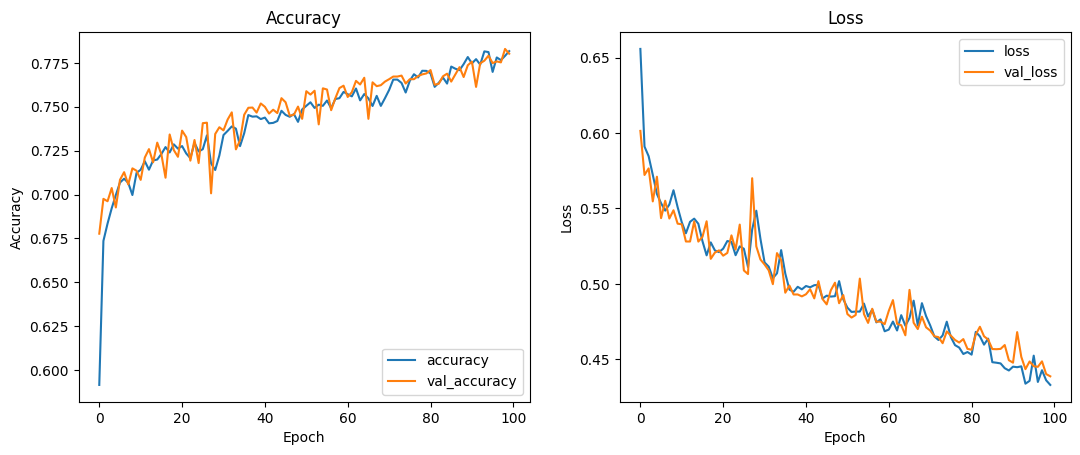

In [15]:
# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')         
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')  
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')         
plt.plot(history.history['val_loss'], label='val_loss')  
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

## GRU

In [7]:
model_gru = Sequential()

model_gru.add(layers.GRU(64, return_sequences=True, input_shape=(60, 50)))
model_gru.add(layers.Dropout(0.2))
model_gru.add(layers.GRU(64, return_sequences=True))
model_gru.add(layers.Dropout(0.2))
model_gru.add(layers.GRU(64, return_sequences=True))
model_gru.add(layers.Dropout(0.2))
model_gru.add(layers.GlobalMaxPooling1D())
model_gru.add(layers.Dense(1, activation='sigmoid'))

cp = ModelCheckpoint('/home/developer/Documents/Master/TFM/models/model_gru/', save_best_only=True)

model_gru.compile(optimizer=Adam(learning_rate=0.0001),
              loss=BinaryCrossentropy(),
              metrics=['accuracy', AUC(name='auc')])
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 64)            22272     
                                                                 
 dropout (Dropout)           (None, 60, 64)            0         
                                                                 
 gru_1 (GRU)                 (None, 60, 64)            24960     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 60, 64)            24960     
                                                                 
 dropout_2 (Dropout)         (None, 60, 64)            0         
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0

In [8]:
history = model_gru.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, callbacks=[cp])

2024-03-29 16:47:17.644124: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 409332000 exceeds 10% of free system memory.
2024-03-29 16:47:17.942796: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 409332000 exceeds 10% of free system memory.


Epoch 1/100
1064/1066 [============================>.] - ETA: 0s - loss: 0.6125 - accuracy: 0.6610 - auc: 0.7237

2024-03-29 16:47:32.834831: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 87720000 exceeds 10% of free system memory.
2024-03-29 16:47:32.925023: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 87720000 exceeds 10% of free system memory.


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 22s 16ms/step - loss: 0.6124 - accuracy: 0.6612 - auc: 0.7239 - val_loss: 0.5626 - val_accuracy: 0.7100 - val_auc: 0.7913
Epoch 2/100
1066/1066 [==============================] - ETA: 0s - loss: 0.5439 - accuracy: 0.7188 - auc: 0.7974

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.5439 - accuracy: 0.7188 - auc: 0.7974 - val_loss: 0.5479 - val_accuracy: 0.7257 - val_auc: 0.8100
Epoch 3/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.5236 - accuracy: 0.7322 - auc: 0.8151

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.5235 - accuracy: 0.7323 - auc: 0.8152 - val_loss: 0.5193 - val_accuracy: 0.7397 - val_auc: 0.8256
Epoch 4/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.5057 - accuracy: 0.7423 - auc: 0.8291

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.5055 - accuracy: 0.7425 - auc: 0.8292 - val_loss: 0.4996 - val_accuracy: 0.7523 - val_auc: 0.8375
Epoch 5/100
1065/1066 [============================>.] - ETA: 0s - loss: 0.4895 - accuracy: 0.7499 - auc: 0.8408

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.4894 - accuracy: 0.7500 - auc: 0.8409 - val_loss: 0.4881 - val_accuracy: 0.7573 - val_auc: 0.8458
Epoch 6/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4779 - accuracy: 0.7570 - auc: 0.8491

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.4779 - accuracy: 0.7570 - auc: 0.8491 - val_loss: 0.4791 - val_accuracy: 0.7636 - val_auc: 0.8532
Epoch 7/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.4670 - accuracy: 0.7632 - auc: 0.8565

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.4667 - accuracy: 0.7633 - auc: 0.8567 - val_loss: 0.4683 - val_accuracy: 0.7665 - val_auc: 0.8589
Epoch 8/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.4593 - accuracy: 0.7692 - auc: 0.8617

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.4591 - accuracy: 0.7693 - auc: 0.8618 - val_loss: 0.4660 - val_accuracy: 0.7670 - val_auc: 0.8626
Epoch 9/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.4502 - accuracy: 0.7740 - auc: 0.8674

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.4503 - accuracy: 0.7738 - auc: 0.8673 - val_loss: 0.4544 - val_accuracy: 0.7741 - val_auc: 0.8670
Epoch 10/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.4434 - accuracy: 0.7750 - auc: 0.8714 - val_loss: 0.4552 - val_accuracy: 0.7711 - val_auc: 0.8684
Epoch 11/100
1064/1066 [============================>.] - ETA: 0s - loss: 0.4371 - accuracy: 0.7785 - auc: 0.8753

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.4374 - accuracy: 0.7784 - auc: 0.8751 - val_loss: 0.4488 - val_accuracy: 0.7711 - val_auc: 0.8709
Epoch 12/100
1062/1066 [============================>.] - ETA: 0s - loss: 0.4330 - accuracy: 0.7841 - auc: 0.8781

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.4328 - accuracy: 0.7844 - auc: 0.8783 - val_loss: 0.4449 - val_accuracy: 0.7803 - val_auc: 0.8733
Epoch 13/100
1062/1066 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.7852 - auc: 0.8815

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 19s 17ms/step - loss: 0.4268 - accuracy: 0.7850 - auc: 0.8814 - val_loss: 0.4404 - val_accuracy: 0.7796 - val_auc: 0.8767
Epoch 14/100
1060/1066 [============================>.] - ETA: 0s - loss: 0.4218 - accuracy: 0.7862 - auc: 0.8838

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 17s 16ms/step - loss: 0.4216 - accuracy: 0.7862 - auc: 0.8839 - val_loss: 0.4367 - val_accuracy: 0.7828 - val_auc: 0.8784
Epoch 15/100
1061/1066 [============================>.] - ETA: 0s - loss: 0.4170 - accuracy: 0.7887 - auc: 0.8868

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.4171 - accuracy: 0.7886 - auc: 0.8867 - val_loss: 0.4305 - val_accuracy: 0.7882 - val_auc: 0.8815
Epoch 16/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4132 - accuracy: 0.7897 - auc: 0.8886

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.4132 - accuracy: 0.7897 - auc: 0.8886 - val_loss: 0.4292 - val_accuracy: 0.7900 - val_auc: 0.8835
Epoch 17/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.4068 - accuracy: 0.7954 - auc: 0.8925

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.4067 - accuracy: 0.7953 - auc: 0.8925 - val_loss: 0.4291 - val_accuracy: 0.7856 - val_auc: 0.8825
Epoch 18/100
1060/1066 [============================>.] - ETA: 0s - loss: 0.4008 - accuracy: 0.7986 - auc: 0.8957

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.4008 - accuracy: 0.7987 - auc: 0.8957 - val_loss: 0.4208 - val_accuracy: 0.7892 - val_auc: 0.8866
Epoch 19/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.3981 - accuracy: 0.8003 - auc: 0.8973 - val_loss: 0.4343 - val_accuracy: 0.7821 - val_auc: 0.8837
Epoch 20/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.3926 - accuracy: 0.8033 - auc: 0.9001 - val_loss: 0.4262 - val_accuracy: 0.7897 - val_auc: 0.8882
Epoch 21/100
1061/1066 [============================>.] - ETA: 0s - loss: 0.3880 - accuracy: 0.8080 - auc: 0.9030

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.3881 - accuracy: 0.8077 - auc: 0.9029 - val_loss: 0.4132 - val_accuracy: 0.7923 - val_auc: 0.8895
Epoch 22/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.3858 - accuracy: 0.8073 - auc: 0.9039

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.3860 - accuracy: 0.8070 - auc: 0.9037 - val_loss: 0.4096 - val_accuracy: 0.7960 - val_auc: 0.8925
Epoch 23/100
1062/1066 [============================>.] - ETA: 0s - loss: 0.3802 - accuracy: 0.8105 - auc: 0.9065

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.3802 - accuracy: 0.8106 - auc: 0.9065 - val_loss: 0.4056 - val_accuracy: 0.7978 - val_auc: 0.8943
Epoch 24/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.3772 - accuracy: 0.8122 - auc: 0.9083 - val_loss: 0.4148 - val_accuracy: 0.7938 - val_auc: 0.8930
Epoch 25/100
1066/1066 [==============================] - ETA: 0s - loss: 0.3739 - accuracy: 0.8145 - auc: 0.9102

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.3739 - accuracy: 0.8145 - auc: 0.9102 - val_loss: 0.4016 - val_accuracy: 0.7999 - val_auc: 0.8963
Epoch 26/100
1066/1066 [==============================] - 9s 9ms/step - loss: 0.3697 - accuracy: 0.8158 - auc: 0.9121 - val_loss: 0.4054 - val_accuracy: 0.7937 - val_auc: 0.8936
Epoch 27/100
1066/1066 [==============================] - ETA: 0s - loss: 0.3654 - accuracy: 0.8193 - auc: 0.9143

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 14s 14ms/step - loss: 0.3654 - accuracy: 0.8193 - auc: 0.9143 - val_loss: 0.3956 - val_accuracy: 0.8015 - val_auc: 0.8990
Epoch 28/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.3627 - accuracy: 0.8216 - auc: 0.9157 - val_loss: 0.4046 - val_accuracy: 0.7964 - val_auc: 0.8984
Epoch 29/100
1065/1066 [============================>.] - ETA: 0s - loss: 0.3576 - accuracy: 0.8215 - auc: 0.9178

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.3576 - accuracy: 0.8215 - auc: 0.9178 - val_loss: 0.3934 - val_accuracy: 0.8007 - val_auc: 0.9002
Epoch 30/100
1065/1066 [============================>.] - ETA: 0s - loss: 0.3538 - accuracy: 0.8241 - auc: 0.9196

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.3537 - accuracy: 0.8241 - auc: 0.9196 - val_loss: 0.3916 - val_accuracy: 0.8077 - val_auc: 0.9012
Epoch 31/100
1060/1066 [============================>.] - ETA: 0s - loss: 0.3517 - accuracy: 0.8246 - auc: 0.9204

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.3519 - accuracy: 0.8244 - auc: 0.9203 - val_loss: 0.3900 - val_accuracy: 0.8041 - val_auc: 0.9026
Epoch 32/100
1060/1066 [============================>.] - ETA: 0s - loss: 0.3478 - accuracy: 0.8265 - auc: 0.9223

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.3477 - accuracy: 0.8265 - auc: 0.9223 - val_loss: 0.3854 - val_accuracy: 0.8037 - val_auc: 0.9038
Epoch 33/100
1066/1066 [==============================] - ETA: 0s - loss: 0.3456 - accuracy: 0.8305 - auc: 0.9237

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.3456 - accuracy: 0.8305 - auc: 0.9237 - val_loss: 0.3841 - val_accuracy: 0.8044 - val_auc: 0.9047
Epoch 34/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.3398 - accuracy: 0.8336 - auc: 0.9263 - val_loss: 0.3887 - val_accuracy: 0.8041 - val_auc: 0.9030
Epoch 35/100
1059/1066 [============================>.] - ETA: 0s - loss: 0.3380 - accuracy: 0.8331 - auc: 0.9270

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.3379 - accuracy: 0.8335 - auc: 0.9272 - val_loss: 0.3816 - val_accuracy: 0.8045 - val_auc: 0.9063
Epoch 36/100
1065/1066 [============================>.] - ETA: 0s - loss: 0.3352 - accuracy: 0.8356 - auc: 0.9283

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.3351 - accuracy: 0.8356 - auc: 0.9283 - val_loss: 0.3796 - val_accuracy: 0.8056 - val_auc: 0.9064
Epoch 37/100
1064/1066 [============================>.] - ETA: 0s - loss: 0.3324 - accuracy: 0.8359 - auc: 0.9294

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 17s 16ms/step - loss: 0.3323 - accuracy: 0.8360 - auc: 0.9294 - val_loss: 0.3786 - val_accuracy: 0.8103 - val_auc: 0.9075
Epoch 38/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.3268 - accuracy: 0.8398 - auc: 0.9319 - val_loss: 0.3825 - val_accuracy: 0.8079 - val_auc: 0.9057
Epoch 39/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.3245 - accuracy: 0.8415 - auc: 0.9331 - val_loss: 0.3869 - val_accuracy: 0.8037 - val_auc: 0.9067
Epoch 40/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.3216 - accuracy: 0.8437 - auc: 0.9342 - val_loss: 0.3868 - val_accuracy: 0.8093 - val_auc: 0.9079
Epoch 41/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.3194 - accuracy: 0.8437 - auc: 0.9351

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.3193 - accuracy: 0.8438 - auc: 0.9351 - val_loss: 0.3726 - val_accuracy: 0.8100 - val_auc: 0.9098
Epoch 42/100
1066/1066 [==============================] - 9s 9ms/step - loss: 0.3162 - accuracy: 0.8440 - auc: 0.9364 - val_loss: 0.3730 - val_accuracy: 0.8133 - val_auc: 0.9109
Epoch 43/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.3141 - accuracy: 0.8469 - auc: 0.9373 - val_loss: 0.3763 - val_accuracy: 0.8097 - val_auc: 0.9095
Epoch 44/100
1062/1066 [============================>.] - ETA: 0s - loss: 0.3105 - accuracy: 0.8480 - auc: 0.9386

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.3105 - accuracy: 0.8479 - auc: 0.9386 - val_loss: 0.3709 - val_accuracy: 0.8114 - val_auc: 0.9124
Epoch 45/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.3076 - accuracy: 0.8488 - auc: 0.9398 - val_loss: 0.3759 - val_accuracy: 0.8108 - val_auc: 0.9113
Epoch 46/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.3052 - accuracy: 0.8518 - auc: 0.9408 - val_loss: 0.3864 - val_accuracy: 0.8068 - val_auc: 0.9083
Epoch 47/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.3021 - accuracy: 0.8547 - auc: 0.9422 - val_loss: 0.3752 - val_accuracy: 0.8109 - val_auc: 0.9119
Epoch 48/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2997 - accuracy: 0.8539 - auc: 0.9429 - val_loss: 0.3730 - val_accuracy: 0.8129 - val_auc: 0.9119
Epoch 49/100
1066/1066 [==============================] - ETA: 0s - loss: 0.2971 - accuracy: 0.8542 - auc: 0.9438

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.2971 - accuracy: 0.8542 - auc: 0.9438 - val_loss: 0.3665 - val_accuracy: 0.8142 - val_auc: 0.9145
Epoch 50/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2919 - accuracy: 0.8597 - auc: 0.9461 - val_loss: 0.3760 - val_accuracy: 0.8131 - val_auc: 0.9116
Epoch 51/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.2930 - accuracy: 0.8582 - auc: 0.9456

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 15ms/step - loss: 0.2931 - accuracy: 0.8581 - auc: 0.9456 - val_loss: 0.3641 - val_accuracy: 0.8179 - val_auc: 0.9153
Epoch 52/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2884 - accuracy: 0.8593 - auc: 0.9471 - val_loss: 0.3662 - val_accuracy: 0.8124 - val_auc: 0.9153
Epoch 53/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2868 - accuracy: 0.8604 - auc: 0.9477 - val_loss: 0.3681 - val_accuracy: 0.8185 - val_auc: 0.9145
Epoch 54/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2831 - accuracy: 0.8625 - auc: 0.9491 - val_loss: 0.4026 - val_accuracy: 0.8059 - val_auc: 0.9065
Epoch 55/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2822 - accuracy: 0.8631 - auc: 0.9497 - val_loss: 0.3717 - val_accuracy: 0.8140 - val_auc: 0.9146
Epoch 56/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2776 - accuracy: 0.8644 - auc: 0.951

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 15s 14ms/step - loss: 0.2664 - accuracy: 0.8713 - auc: 0.9548 - val_loss: 0.3612 - val_accuracy: 0.8168 - val_auc: 0.9170
Epoch 62/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2653 - accuracy: 0.8712 - auc: 0.9555 - val_loss: 0.3649 - val_accuracy: 0.8219 - val_auc: 0.9181
Epoch 63/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2630 - accuracy: 0.8723 - auc: 0.9562 - val_loss: 0.3654 - val_accuracy: 0.8227 - val_auc: 0.9173
Epoch 64/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2614 - accuracy: 0.8725 - auc: 0.9564 - val_loss: 0.3756 - val_accuracy: 0.8179 - val_auc: 0.9162
Epoch 65/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2592 - accuracy: 0.8745 - auc: 0.9573 - val_loss: 0.3643 - val_accuracy: 0.8259 - val_auc: 0.9187
Epoch 66/100
1062/1066 [============================>.] - ETA: 0s - loss: 0.2557 - accuracy: 0.8758 - auc: 0.9584

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.2556 - accuracy: 0.8758 - auc: 0.9584 - val_loss: 0.3607 - val_accuracy: 0.8226 - val_auc: 0.9190
Epoch 67/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2527 - accuracy: 0.8771 - auc: 0.9593 - val_loss: 0.3675 - val_accuracy: 0.8215 - val_auc: 0.9172
Epoch 68/100
1062/1066 [============================>.] - ETA: 0s - loss: 0.2530 - accuracy: 0.8775 - auc: 0.9594

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.2533 - accuracy: 0.8773 - auc: 0.9593 - val_loss: 0.3600 - val_accuracy: 0.8241 - val_auc: 0.9204
Epoch 69/100
1064/1066 [============================>.] - ETA: 0s - loss: 0.2487 - accuracy: 0.8806 - auc: 0.9608

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 17s 16ms/step - loss: 0.2486 - accuracy: 0.8806 - auc: 0.9609 - val_loss: 0.3596 - val_accuracy: 0.8263 - val_auc: 0.9206
Epoch 70/100
1066/1066 [==============================] - 10s 10ms/step - loss: 0.2475 - accuracy: 0.8796 - auc: 0.9610 - val_loss: 0.3638 - val_accuracy: 0.8279 - val_auc: 0.9215
Epoch 71/100
1066/1066 [==============================] - 10s 10ms/step - loss: 0.2455 - accuracy: 0.8820 - auc: 0.9616 - val_loss: 0.3623 - val_accuracy: 0.8267 - val_auc: 0.9193
Epoch 72/100
1066/1066 [==============================] - 10s 10ms/step - loss: 0.2447 - accuracy: 0.8831 - auc: 0.9620 - val_loss: 0.3753 - val_accuracy: 0.8181 - val_auc: 0.9175
Epoch 73/100
1066/1066 [==============================] - ETA: 0s - loss: 0.2416 - accuracy: 0.8810 - auc: 0.9626

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_gru/assets


1066/1066 [==============================] - 20s 19ms/step - loss: 0.2416 - accuracy: 0.8810 - auc: 0.9626 - val_loss: 0.3572 - val_accuracy: 0.8311 - val_auc: 0.9228
Epoch 74/100
1066/1066 [==============================] - 10s 10ms/step - loss: 0.2426 - accuracy: 0.8832 - auc: 0.9627 - val_loss: 0.3644 - val_accuracy: 0.8238 - val_auc: 0.9194
Epoch 75/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2380 - accuracy: 0.8843 - auc: 0.9639 - val_loss: 0.3612 - val_accuracy: 0.8272 - val_auc: 0.9210
Epoch 76/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2371 - accuracy: 0.8851 - auc: 0.9643 - val_loss: 0.3607 - val_accuracy: 0.8264 - val_auc: 0.9210
Epoch 77/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2343 - accuracy: 0.8858 - auc: 0.9648 - val_loss: 0.3611 - val_accuracy: 0.8271 - val_auc: 0.9206
Epoch 78/100
1066/1066 [==============================] - 10s 9ms/step - loss: 0.2323 - accuracy: 0.8880 - auc: 0.96

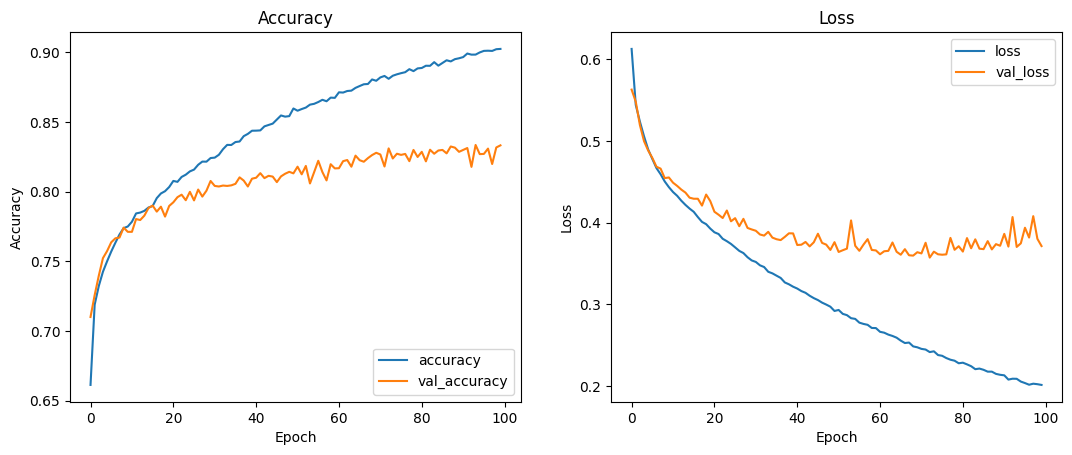

In [9]:
# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')         
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')  
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')         
plt.plot(history.history['val_loss'], label='val_loss')  
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

## LSTM

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, regularizers, optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()

# Permitir secuencias de longitud variable
model.add(layers.Input(shape=(60, 50)))  # 'None' permite secuencias de longitud variable
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.4))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.4))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.4))



# Usar GlobalMaxPooling1D para manejar secuencias de longitud variable
model.add(layers.GlobalMaxPooling1D())

model.add(layers.Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.001)))

# Callbacks
checkpoint_path = '/home/developer/Documents/Master/TFM/models/model_lstm/'
checkpoint = ModelCheckpoint(checkpoint_path, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=500, restore_best_weights=True)

# Compilar el modelo
adam_optimizer = optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy', 'AUC'])

# Resumen del modelo
model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[checkpoint, early_stopping])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            29440     
                                                                 
 dropout_3 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_4 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 64)            33024     
                                                                 
 dropout_5 (Dropout)         (None, 60, 64)            0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)              

2024-03-29 17:08:12.272391: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 409332000 exceeds 10% of free system memory.


Epoch 1/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.5957 - accuracy: 0.6824 - auc: 0.7459

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 25s 20ms/step - loss: 0.5956 - accuracy: 0.6824 - auc: 0.7460 - val_loss: 0.5720 - val_accuracy: 0.7220 - val_auc: 0.7981
Epoch 2/100
1065/1066 [============================>.] - ETA: 0s - loss: 0.5379 - accuracy: 0.7241 - auc: 0.8040

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 21s 20ms/step - loss: 0.5378 - accuracy: 0.7240 - auc: 0.8040 - val_loss: 0.5470 - val_accuracy: 0.7372 - val_auc: 0.8197
Epoch 3/100
1065/1066 [============================>.] - ETA: 0s - loss: 0.5164 - accuracy: 0.7359 - auc: 0.8213

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 19s 18ms/step - loss: 0.5164 - accuracy: 0.7360 - auc: 0.8213 - val_loss: 0.5377 - val_accuracy: 0.7435 - val_auc: 0.8307
Epoch 4/100
1066/1066 [==============================] - ETA: 0s - loss: 0.5011 - accuracy: 0.7431 - auc: 0.8331

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 19s 18ms/step - loss: 0.5011 - accuracy: 0.7431 - auc: 0.8331 - val_loss: 0.5214 - val_accuracy: 0.7490 - val_auc: 0.8408
Epoch 5/100
1062/1066 [============================>.] - ETA: 0s - loss: 0.4873 - accuracy: 0.7506 - auc: 0.8429

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 17s 16ms/step - loss: 0.4874 - accuracy: 0.7504 - auc: 0.8428 - val_loss: 0.5073 - val_accuracy: 0.7570 - val_auc: 0.8488
Epoch 6/100
1065/1066 [============================>.] - ETA: 0s - loss: 0.4730 - accuracy: 0.7570 - auc: 0.8522

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.4730 - accuracy: 0.7570 - auc: 0.8521 - val_loss: 0.4969 - val_accuracy: 0.7596 - val_auc: 0.8573
Epoch 7/100
1061/1066 [============================>.] - ETA: 0s - loss: 0.4615 - accuracy: 0.7656 - auc: 0.8602

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 17s 16ms/step - loss: 0.4615 - accuracy: 0.7654 - auc: 0.8602 - val_loss: 0.4842 - val_accuracy: 0.7666 - val_auc: 0.8617
Epoch 8/100
1064/1066 [============================>.] - ETA: 0s - loss: 0.4533 - accuracy: 0.7688 - auc: 0.8653

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.4532 - accuracy: 0.7688 - auc: 0.8653 - val_loss: 0.4840 - val_accuracy: 0.7570 - val_auc: 0.8638
Epoch 9/100
1066/1066 [==============================] - ETA: 0s - loss: 0.4458 - accuracy: 0.7739 - auc: 0.8702

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 17s 16ms/step - loss: 0.4458 - accuracy: 0.7739 - auc: 0.8702 - val_loss: 0.4684 - val_accuracy: 0.7750 - val_auc: 0.8716
Epoch 10/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.4376 - accuracy: 0.7779 - auc: 0.8753 - val_loss: 0.4770 - val_accuracy: 0.7732 - val_auc: 0.8721
Epoch 11/100
1065/1066 [============================>.] - ETA: 0s - loss: 0.4314 - accuracy: 0.7841 - auc: 0.8796

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.4314 - accuracy: 0.7842 - auc: 0.8796 - val_loss: 0.4615 - val_accuracy: 0.7780 - val_auc: 0.8784
Epoch 12/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.4242 - accuracy: 0.7860 - auc: 0.8833 - val_loss: 0.4628 - val_accuracy: 0.7741 - val_auc: 0.8762
Epoch 13/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.4193 - accuracy: 0.7905 - auc: 0.8868

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 16ms/step - loss: 0.4192 - accuracy: 0.7905 - auc: 0.8868 - val_loss: 0.4460 - val_accuracy: 0.7795 - val_auc: 0.8823
Epoch 14/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.4141 - accuracy: 0.7931 - auc: 0.8892 - val_loss: 0.4602 - val_accuracy: 0.7767 - val_auc: 0.8790
Epoch 15/100
1064/1066 [============================>.] - ETA: 0s - loss: 0.4084 - accuracy: 0.7953 - auc: 0.8926

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 17s 16ms/step - loss: 0.4084 - accuracy: 0.7954 - auc: 0.8927 - val_loss: 0.4460 - val_accuracy: 0.7859 - val_auc: 0.8870
Epoch 16/100
1064/1066 [============================>.] - ETA: 0s - loss: 0.4048 - accuracy: 0.7978 - auc: 0.8947

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.4047 - accuracy: 0.7977 - auc: 0.8947 - val_loss: 0.4377 - val_accuracy: 0.7852 - val_auc: 0.8875
Epoch 17/100
1062/1066 [============================>.] - ETA: 0s - loss: 0.3990 - accuracy: 0.8017 - auc: 0.8979

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 17s 16ms/step - loss: 0.3987 - accuracy: 0.8019 - auc: 0.8981 - val_loss: 0.4298 - val_accuracy: 0.7900 - val_auc: 0.8915
Epoch 18/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.3938 - accuracy: 0.8022 - auc: 0.9003 - val_loss: 0.4343 - val_accuracy: 0.7929 - val_auc: 0.8916
Epoch 19/100
1066/1066 [==============================] - ETA: 0s - loss: 0.3893 - accuracy: 0.8055 - auc: 0.9026

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 17s 16ms/step - loss: 0.3893 - accuracy: 0.8055 - auc: 0.9026 - val_loss: 0.4242 - val_accuracy: 0.7923 - val_auc: 0.8938
Epoch 20/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.3871 - accuracy: 0.8058 - auc: 0.9038 - val_loss: 0.4348 - val_accuracy: 0.7938 - val_auc: 0.8944
Epoch 21/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.3804 - accuracy: 0.8103 - auc: 0.9075 - val_loss: 0.4351 - val_accuracy: 0.7910 - val_auc: 0.8960
Epoch 22/100
1064/1066 [============================>.] - ETA: 0s - loss: 0.3766 - accuracy: 0.8128 - auc: 0.9092

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.3765 - accuracy: 0.8130 - auc: 0.9092 - val_loss: 0.4241 - val_accuracy: 0.7973 - val_auc: 0.8966
Epoch 23/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.3726 - accuracy: 0.8133 - auc: 0.9110 - val_loss: 0.4285 - val_accuracy: 0.7973 - val_auc: 0.8976
Epoch 24/100
1062/1066 [============================>.] - ETA: 0s - loss: 0.3674 - accuracy: 0.8179 - auc: 0.9137

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 16s 15ms/step - loss: 0.3676 - accuracy: 0.8176 - auc: 0.9136 - val_loss: 0.4197 - val_accuracy: 0.7903 - val_auc: 0.8977
Epoch 25/100
1061/1066 [============================>.] - ETA: 0s - loss: 0.3639 - accuracy: 0.8171 - auc: 0.9150

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 19s 18ms/step - loss: 0.3637 - accuracy: 0.8173 - auc: 0.9152 - val_loss: 0.4144 - val_accuracy: 0.7988 - val_auc: 0.9003
Epoch 26/100
1066/1066 [==============================] - 11s 11ms/step - loss: 0.3591 - accuracy: 0.8198 - auc: 0.9173 - val_loss: 0.4169 - val_accuracy: 0.7929 - val_auc: 0.8986
Epoch 27/100
1062/1066 [============================>.] - ETA: 0s - loss: 0.3541 - accuracy: 0.8233 - auc: 0.9199

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 21s 20ms/step - loss: 0.3541 - accuracy: 0.8233 - auc: 0.9199 - val_loss: 0.4079 - val_accuracy: 0.8015 - val_auc: 0.9016
Epoch 28/100
1062/1066 [============================>.] - ETA: 0s - loss: 0.3536 - accuracy: 0.8230 - auc: 0.9200

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.3533 - accuracy: 0.8233 - auc: 0.9202 - val_loss: 0.4058 - val_accuracy: 0.7971 - val_auc: 0.9027
Epoch 29/100
1066/1066 [==============================] - 11s 11ms/step - loss: 0.3476 - accuracy: 0.8268 - auc: 0.9231 - val_loss: 0.4072 - val_accuracy: 0.8007 - val_auc: 0.9025
Epoch 30/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.3453 - accuracy: 0.8279 - auc: 0.9242 - val_loss: 0.4138 - val_accuracy: 0.7893 - val_auc: 0.8989
Epoch 31/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.3442 - accuracy: 0.8271 - auc: 0.9243

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 19s 18ms/step - loss: 0.3442 - accuracy: 0.8271 - auc: 0.9243 - val_loss: 0.4047 - val_accuracy: 0.8008 - val_auc: 0.9044
Epoch 32/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.3374 - accuracy: 0.8322 - auc: 0.9275

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 16ms/step - loss: 0.3374 - accuracy: 0.8323 - auc: 0.9276 - val_loss: 0.3935 - val_accuracy: 0.8012 - val_auc: 0.9071
Epoch 33/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.3339 - accuracy: 0.8337 - auc: 0.9290 - val_loss: 0.4052 - val_accuracy: 0.8018 - val_auc: 0.9042
Epoch 34/100
1065/1066 [============================>.] - ETA: 0s - loss: 0.3308 - accuracy: 0.8367 - auc: 0.9306

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.3307 - accuracy: 0.8368 - auc: 0.9307 - val_loss: 0.3859 - val_accuracy: 0.8053 - val_auc: 0.9102
Epoch 35/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.3266 - accuracy: 0.8369 - auc: 0.9321 - val_loss: 0.3897 - val_accuracy: 0.8094 - val_auc: 0.9097
Epoch 36/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.3251 - accuracy: 0.8396 - auc: 0.9331 - val_loss: 0.3973 - val_accuracy: 0.8064 - val_auc: 0.9068
Epoch 37/100
1064/1066 [============================>.] - ETA: 0s - loss: 0.3213 - accuracy: 0.8412 - auc: 0.9346

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 17s 16ms/step - loss: 0.3213 - accuracy: 0.8413 - auc: 0.9347 - val_loss: 0.3826 - val_accuracy: 0.8126 - val_auc: 0.9107
Epoch 38/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.3179 - accuracy: 0.8408 - auc: 0.9355 - val_loss: 0.3836 - val_accuracy: 0.8071 - val_auc: 0.9101
Epoch 39/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.3140 - accuracy: 0.8445 - auc: 0.9374 - val_loss: 0.3842 - val_accuracy: 0.8090 - val_auc: 0.9096
Epoch 40/100
1061/1066 [============================>.] - ETA: 0s - loss: 0.3109 - accuracy: 0.8465 - auc: 0.9388

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.3109 - accuracy: 0.8464 - auc: 0.9387 - val_loss: 0.3801 - val_accuracy: 0.8108 - val_auc: 0.9114
Epoch 41/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.3073 - accuracy: 0.8493 - auc: 0.9404 - val_loss: 0.3813 - val_accuracy: 0.8100 - val_auc: 0.9124
Epoch 42/100
1061/1066 [============================>.] - ETA: 0s - loss: 0.3049 - accuracy: 0.8489 - auc: 0.9409

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.3047 - accuracy: 0.8489 - auc: 0.9409 - val_loss: 0.3787 - val_accuracy: 0.8105 - val_auc: 0.9116
Epoch 43/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.3022 - accuracy: 0.8507 - auc: 0.9420 - val_loss: 0.3869 - val_accuracy: 0.8059 - val_auc: 0.9095
Epoch 44/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2971 - accuracy: 0.8546 - auc: 0.9443 - val_loss: 0.3947 - val_accuracy: 0.7986 - val_auc: 0.9064
Epoch 45/100
1062/1066 [============================>.] - ETA: 0s - loss: 0.2936 - accuracy: 0.8550 - auc: 0.9456

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.2935 - accuracy: 0.8551 - auc: 0.9456 - val_loss: 0.3737 - val_accuracy: 0.8126 - val_auc: 0.9143
Epoch 46/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2947 - accuracy: 0.8576 - auc: 0.9454 - val_loss: 0.3879 - val_accuracy: 0.8063 - val_auc: 0.9091
Epoch 47/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2909 - accuracy: 0.8586 - auc: 0.9468 - val_loss: 0.3888 - val_accuracy: 0.8093 - val_auc: 0.9092
Epoch 48/100
1065/1066 [============================>.] - ETA: 0s - loss: 0.2852 - accuracy: 0.8617 - auc: 0.9489

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 17s 16ms/step - loss: 0.2854 - accuracy: 0.8617 - auc: 0.9488 - val_loss: 0.3677 - val_accuracy: 0.8204 - val_auc: 0.9179
Epoch 49/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2855 - accuracy: 0.8612 - auc: 0.9488 - val_loss: 0.3743 - val_accuracy: 0.8187 - val_auc: 0.9159
Epoch 50/100
1065/1066 [============================>.] - ETA: 0s - loss: 0.2812 - accuracy: 0.8624 - auc: 0.9502

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 19s 17ms/step - loss: 0.2812 - accuracy: 0.8624 - auc: 0.9502 - val_loss: 0.3665 - val_accuracy: 0.8194 - val_auc: 0.9185
Epoch 51/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2784 - accuracy: 0.8641 - auc: 0.9514 - val_loss: 0.3701 - val_accuracy: 0.8120 - val_auc: 0.9143
Epoch 52/100
1066/1066 [==============================] - 12s 11ms/step - loss: 0.2766 - accuracy: 0.8661 - auc: 0.9521 - val_loss: 0.3688 - val_accuracy: 0.8192 - val_auc: 0.9163
Epoch 53/100
1066/1066 [==============================] - 12s 11ms/step - loss: 0.2747 - accuracy: 0.8659 - auc: 0.9526 - val_loss: 0.3750 - val_accuracy: 0.8115 - val_auc: 0.9144
Epoch 54/100
1063/1066 [============================>.] - ETA: 0s - loss: 0.2711 - accuracy: 0.8693 - auc: 0.9540

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 22s 21ms/step - loss: 0.2711 - accuracy: 0.8693 - auc: 0.9540 - val_loss: 0.3624 - val_accuracy: 0.8218 - val_auc: 0.9192
Epoch 55/100
1066/1066 [==============================] - 12s 11ms/step - loss: 0.2683 - accuracy: 0.8701 - auc: 0.9549 - val_loss: 0.3740 - val_accuracy: 0.8138 - val_auc: 0.9145
Epoch 56/100
1066/1066 [==============================] - 12s 11ms/step - loss: 0.2689 - accuracy: 0.8698 - auc: 0.9545 - val_loss: 0.3660 - val_accuracy: 0.8187 - val_auc: 0.9166
Epoch 57/100
1066/1066 [==============================] - 12s 11ms/step - loss: 0.2643 - accuracy: 0.8717 - auc: 0.9562 - val_loss: 0.3671 - val_accuracy: 0.8116 - val_auc: 0.9151
Epoch 58/100
1065/1066 [============================>.] - ETA: 0s - loss: 0.2620 - accuracy: 0.8737 - auc: 0.9571

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.2620 - accuracy: 0.8737 - auc: 0.9572 - val_loss: 0.3590 - val_accuracy: 0.8212 - val_auc: 0.9196
Epoch 59/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2590 - accuracy: 0.8747 - auc: 0.9579 - val_loss: 0.3826 - val_accuracy: 0.8086 - val_auc: 0.9112
Epoch 60/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2551 - accuracy: 0.8768 - auc: 0.9591 - val_loss: 0.3740 - val_accuracy: 0.8153 - val_auc: 0.9142
Epoch 61/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2547 - accuracy: 0.8769 - auc: 0.9594 - val_loss: 0.3615 - val_accuracy: 0.8249 - val_auc: 0.9197
Epoch 62/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2499 - accuracy: 0.8791 - auc: 0.9608 - val_loss: 0.3706 - val_accuracy: 0.8148 - val_auc: 0.9161
Epoch 63/100
1064/1066 [============================>.] - ETA: 0s - loss: 0.2521 - accuracy: 0.8786 - auc: 0.9601

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 19s 18ms/step - loss: 0.2522 - accuracy: 0.8785 - auc: 0.9601 - val_loss: 0.3532 - val_accuracy: 0.8219 - val_auc: 0.9212
Epoch 64/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2488 - accuracy: 0.8802 - auc: 0.9613 - val_loss: 0.3557 - val_accuracy: 0.8216 - val_auc: 0.9210
Epoch 65/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2459 - accuracy: 0.8798 - auc: 0.9620 - val_loss: 0.3793 - val_accuracy: 0.8130 - val_auc: 0.9130
Epoch 66/100
1066/1066 [==============================] - ETA: 0s - loss: 0.2452 - accuracy: 0.8808 - auc: 0.9624

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.2452 - accuracy: 0.8808 - auc: 0.9624 - val_loss: 0.3518 - val_accuracy: 0.8246 - val_auc: 0.9225
Epoch 67/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2419 - accuracy: 0.8844 - auc: 0.9635 - val_loss: 0.3611 - val_accuracy: 0.8183 - val_auc: 0.9192
Epoch 68/100
1066/1066 [==============================] - ETA: 0s - loss: 0.2423 - accuracy: 0.8834 - auc: 0.9632

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 19s 18ms/step - loss: 0.2423 - accuracy: 0.8834 - auc: 0.9632 - val_loss: 0.3483 - val_accuracy: 0.8252 - val_auc: 0.9236
Epoch 69/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2380 - accuracy: 0.8839 - auc: 0.9646 - val_loss: 0.3502 - val_accuracy: 0.8267 - val_auc: 0.9226
Epoch 70/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2363 - accuracy: 0.8860 - auc: 0.9650 - val_loss: 0.3600 - val_accuracy: 0.8164 - val_auc: 0.9190
Epoch 71/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2369 - accuracy: 0.8845 - auc: 0.9647 - val_loss: 0.3554 - val_accuracy: 0.8213 - val_auc: 0.9207
Epoch 72/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2363 - accuracy: 0.8873 - auc: 0.9651 - val_loss: 0.3570 - val_accuracy: 0.8209 - val_auc: 0.9199
Epoch 73/100
1064/1066 [============================>.] - ETA: 0s - loss: 0.2319 - accuracy: 0.8875 - auc: 0.9662

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 17s 16ms/step - loss: 0.2321 - accuracy: 0.8873 - auc: 0.9662 - val_loss: 0.3481 - val_accuracy: 0.8295 - val_auc: 0.9236
Epoch 74/100
1062/1066 [============================>.] - ETA: 0s - loss: 0.2294 - accuracy: 0.8896 - auc: 0.9671

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 19s 18ms/step - loss: 0.2298 - accuracy: 0.8892 - auc: 0.9670 - val_loss: 0.3456 - val_accuracy: 0.8283 - val_auc: 0.9244
Epoch 75/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2269 - accuracy: 0.8912 - auc: 0.9679 - val_loss: 0.3468 - val_accuracy: 0.8261 - val_auc: 0.9243
Epoch 76/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2259 - accuracy: 0.8915 - auc: 0.9680 - val_loss: 0.3503 - val_accuracy: 0.8252 - val_auc: 0.9235
Epoch 77/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2250 - accuracy: 0.8926 - auc: 0.9685 - val_loss: 0.3562 - val_accuracy: 0.8264 - val_auc: 0.9202
Epoch 78/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2237 - accuracy: 0.8929 - auc: 0.9688 - val_loss: 0.3507 - val_accuracy: 0.8274 - val_auc: 0.9224
Epoch 79/100
1066/1066 [==============================] - 11s 11ms/step - loss: 0.2224 - accuracy: 0.8922 - auc: 

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 20s 19ms/step - loss: 0.2039 - accuracy: 0.9023 - auc: 0.9740 - val_loss: 0.3422 - val_accuracy: 0.8378 - val_auc: 0.9273
Epoch 90/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2005 - accuracy: 0.9050 - auc: 0.9750 - val_loss: 0.3465 - val_accuracy: 0.8334 - val_auc: 0.9269
Epoch 91/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2057 - accuracy: 0.9007 - auc: 0.9735 - val_loss: 0.3495 - val_accuracy: 0.8335 - val_auc: 0.9234
Epoch 92/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.1990 - accuracy: 0.9038 - auc: 0.9752 - val_loss: 0.3457 - val_accuracy: 0.8343 - val_auc: 0.9250
Epoch 93/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2024 - accuracy: 0.9042 - auc: 0.9746 - val_loss: 0.3592 - val_accuracy: 0.8257 - val_auc: 0.9209
Epoch 94/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.2016 - accuracy: 0.9055 - auc: 

INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


INFO:tensorflow:Assets written to: /home/developer/Documents/Master/TFM/models/model_lstm/assets


1066/1066 [==============================] - 18s 17ms/step - loss: 0.1921 - accuracy: 0.9093 - auc: 0.9771 - val_loss: 0.3419 - val_accuracy: 0.8350 - val_auc: 0.9283
Epoch 100/100
1066/1066 [==============================] - 11s 10ms/step - loss: 0.1920 - accuracy: 0.9082 - auc: 0.9770 - val_loss: 0.3503 - val_accuracy: 0.8298 - val_auc: 0.9243


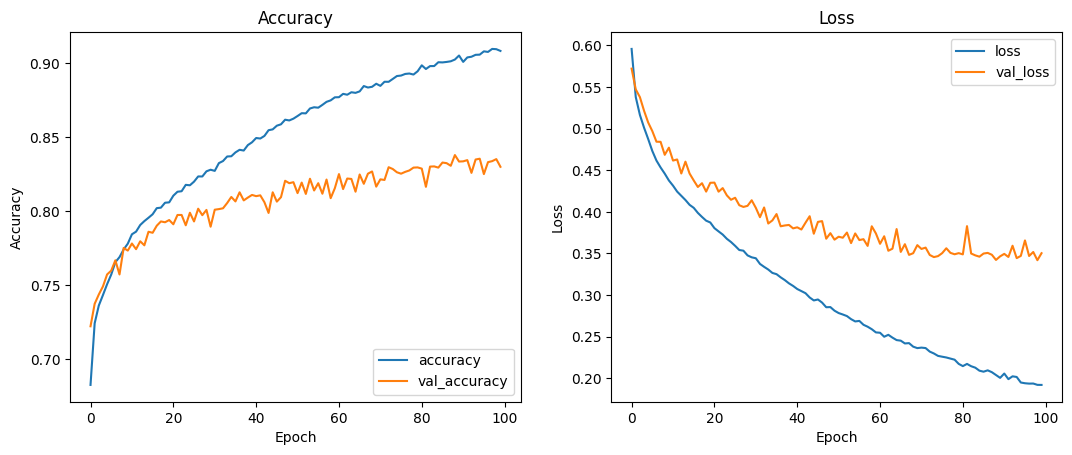

In [11]:
# Plotting training and testing curves
default_size = plt.rcParams['figure.figsize']
fig = plt.figure(figsize=[default_size[0] * 2, default_size[1]])

fig.add_subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'accuracy')         
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')  
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')

fig.add_subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')         
plt.plot(history.history['val_loss'], label='val_loss')  
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(loc='upper right')
plt.show()

In [41]:
# Cargar el modelo SavedModel
model = tf.keras.models.load_model('/home/developer/Documents/Master/TFM/models/model_lstm')

# Guardar el modelo en formato H5
model.save('/home/developer/Documents/Master/TFM/models/model_LSTM.h5')

In [17]:
cp = ModelCheckpoint('/home/developer/Documents/Master/TFM/models/model_lstm/best_model.h5', save_best_only=True)
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import tensorflow as tf

best_model = load_model('/home/developer/Documents/Master/TFM/models/model_lstm/')
test_predictions = (best_model.predict(X_test) > 0.5).astype(int)



print(classification_report(y_test, test_predictions))

KeyboardInterrupt: 

Loading model from: /home/developer/Documents/Master/TFM/models/model_mp/
229/229 [==============================] - 0s 860us/step
Loading model from: /home/developer/Documents/Master/TFM/models/model_rnn/
229/229 [==============================] - 4s 16ms/step
Loading model from: /home/developer/Documents/Master/TFM/models/model_gru/
229/229 [==============================] - 1s 4ms/step
Loading model from: /home/developer/Documents/Master/TFM/models/model_lstm/
229/229 [==============================] - 2s 5ms/step


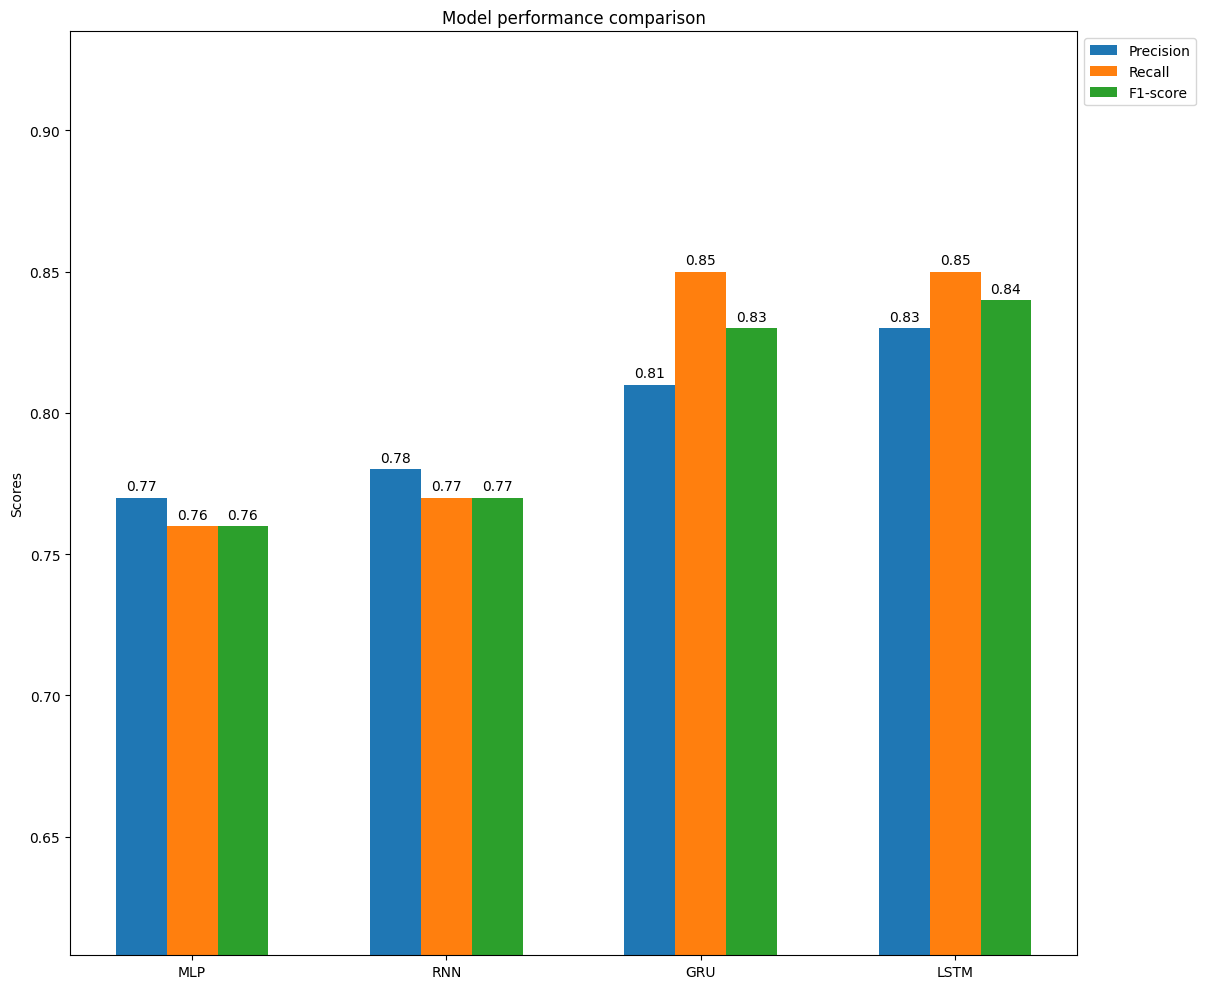

In [16]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, precision_recall_fscore_support
import matplotlib.pyplot as plt
import numpy as np
# Nombres de los modelos y sus rutas
model_paths = {
    'MLP': '/home/developer/Documents/Master/TFM/models/model_mp/',
    'RNN': '/home/developer/Documents/Master/TFM/models/model_rnn/',
    'GRU': '/home/developer/Documents/Master/TFM/models/model_gru/',
    'LSTM': '/home/developer/Documents/Master/TFM/models/model_lstm/'
}

# Carga los modelos y evalúa en el conjunto de prueba
metrics = {}

for model_name, path in model_paths.items():
    print(f"Loading model from: {path}")
    model = load_model(path)
    predictions = (model.predict(X_test) > 0.5).astype(int)
    report = precision_recall_fscore_support(y_test, predictions, average='binary')
    # Redondear las métricas a dos decimales antes de almacenarlas
    metrics[model_name] = [round(metric, 2) for metric in report[:-1]]  # Exclude support

# Preparación de datos para la gráfica
labels = list(metrics.keys())
precision = [metrics[model][0] for model in labels]
recall = [metrics[model][1] for model in labels]
f1_score = [metrics[model][2] for model in labels]

# Tamaño de la gráfica
x = np.arange(len(labels))
width = 0.2

# Ajuste del tamaño de la figura para evitar superposición
fig, ax = plt.subplots(figsize=(16, 10))

# Agregando barras para cada métrica
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-score')

# Añadiendo etiquetas y títulos
ax.set_ylabel('Scores')
ax.set_title('Model performance comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Mueve la leyenda fuera de la gráfica

# Ajustar el rango del eje y para que no comience en 0 si no es necesario
lower_bound = min(precision + recall + f1_score) * 0.8
upper_bound = max(precision + recall + f1_score) * 1.1
ax.set_ylim([lower_bound, upper_bound])

# Función para añadir etiquetas sobre cada barra
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                    textcoords="offset points",
                    ha='center', va='bottom')

# Añadir etiquetas
add_labels(rects1)
add_labels(rects2)
add_labels(rects3)

# Ajustar layout para considerar la leyenda
fig.tight_layout(rect=[0, 0, 0.76, 1])



plt.show()

In [31]:



model = tf.keras.models.load_model('/home/developer/Documents/Master/TFM/model_LSTM.h5')
def predict_sentiment(text):
    # Preprocesar el texto
    word_vectors = message_to_word_vectors(text)
    
    # Asegurarse de que hay al menos un vector de palabra, si no, agregar un vector cero
    if len(word_vectors) == 0:
        word_vectors = np.zeros((1, 50))
    
    # Realizar padding si es necesario
    word_vectors_padded = pad_X([word_vectors], desired_sequence_length=80)
    
    # Predecir el sentimiento
    prediction = model.predict(word_vectors_padded)
    
    # Interpretar la salida
    sentiment = 'Positivo' if prediction[0] > 0.5 else 'Negativo'
    print(prediction[0])
    return sentiment, prediction[0]

# Ejemplo de uso
text = "with upcoming election india saga going important pair look current modi leads govt elected with deal brexit combination this weekly looks juicy bears imho"
sentiment = predict_sentiment(text)
print(f"El sentimiento de la frase es: {sentiment}")

1/1 [==============================] - 1s 779ms/step
[0.5422434]
El sentimiento de la frase es: ('Positivo', array([0.5422434], dtype=float32))
